In [635]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter
from scipy.stats import ttest_ind, pointbiserialr, chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
#from info_gain import info_gain
from sklearn.feature_extraction.image import grid_to_graph
from sklearn import tree, metrics
#from sklearn.externals.six import StringIO
from IPython.display import Image, display
import pydotplus
import seaborn as sns
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Step 1: Data Understanding

In [636]:
df = pd.read_csv('telecom_churn_data.csv')

In [637]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [638]:
print(list(df.columns))

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou

In [639]:
null_df = pd.DataFrame(df.isnull().sum()/len(df.index)*100,columns=['C'])

In [640]:
null_df.sort_values(by='C',ascending=False).head(50)

,C
arpu_3g_6,74.846748
night_pck_user_6,74.846748
total_rech_data_6,74.846748
arpu_2g_6,74.846748
max_rech_data_6,74.846748
fb_user_6,74.846748
av_rech_amt_data_6,74.846748
date_of_last_rech_data_6,74.846748
count_rech_2g_6,74.846748
count_rech_3g_6,74.846748


# Step 2: Filtering High Value Customers

**Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).**

**Hence, the columns to be considered are: total_rech_amt_6, total_rech_amt_7, av_rech_amt_data_6, av_rech_amt_data_7, total_rech_data_6, total_rech_data_7.**     

In [641]:
#Checking the nulls in the dataset for these particular columns
print(df['total_rech_amt_6'].isnull().sum())
print(df['total_rech_amt_7'].isnull().sum())
print(df['av_rech_amt_data_6'].isnull().sum())
print(df['av_rech_amt_data_7'].isnull().sum())
print(df['total_rech_data_6'].isnull().sum())
print(df['total_rech_data_7'].isnull().sum())

0
0
74846
74428
74846
74428


In [642]:
#Imputing the missing values with zeros
df['av_rech_amt_data_6'] = df['av_rech_amt_data_6'].fillna(0)
df['av_rech_amt_data_7'] = df['av_rech_amt_data_7'].fillna(0)
df['total_rech_data_6'] = df['total_rech_data_6'].fillna(0)
df['total_rech_data_7'] = df['total_rech_data_7'].fillna(0)

**Similarly, we take the same decision to impute the missing values as zeroes for corresponding columns in action phase 8.**

In [643]:
print(df['total_rech_amt_8'].isnull().sum())
print(df['av_rech_amt_data_8'].isnull().sum())
print(df['total_rech_data_8'].isnull().sum())

0
73660
73660


In [644]:
#Imputing the missing values with zeroes for the corresponding columns in the action phase - 8
df['av_rech_amt_data_8'] = df['av_rech_amt_data_8'].fillna(0)
df['total_rech_data_8'] = df['total_rech_data_8'].fillna(0)

In [645]:
#Finding the totals for months 6 and 7 
df['voice_recharge_good'] = df['total_rech_amt_6'] + df['total_rech_amt_7']/2

In [646]:
#Finding the total recharge data amount for months 6 and 7
df['data_recharge_good'] = (df['av_rech_amt_data_6']*df['total_rech_data_6']+df['av_rech_amt_data_7']*df['total_rech_data_7'])/2

In [647]:
#Average recharge amount for months 6 & 7
df['rech_amt_good'] = df['voice_recharge_good']+df['data_recharge_good']

In [648]:
#Finding the 70th percentile for finding the high value customers
high_val = df['rech_amt_good'].quantile(0.7)

In [649]:
print(high_val)

677.0


In [650]:
df['highvalcust'] = df['rech_amt_good'].apply(lambda x: 1 if x>high_val else 0)

In [651]:
df[['highvalcust','rech_amt_good']]

,highvalcust,rech_amt_good
0,1,740.0
1,0,343.0
2,0,325.5
3,0,385.0
4,0,399.0
...,...,...
99994,0,115.0
99995,0,165.0
99996,0,158.0
99997,1,1792.5


In [652]:
df['highvalcust'].value_counts()

0    70023
1    29976
Name: highvalcust, dtype: int64

In [653]:
df = df[df['highvalcust']==1]

In [654]:
df.shape

(29976, 230)

In [655]:
#Check nulls again

In [656]:
null_df = pd.DataFrame(df.isnull().sum()/len(df.index)*100,columns=['C'])

In [657]:
null_df.sort_values(by='C',ascending=False).head(50)

,C
max_rech_data_9,52.098345
fb_user_9,52.098345
date_of_last_rech_data_9,52.098345
arpu_3g_9,52.098345
av_rech_amt_data_9,52.098345
total_rech_data_9,52.098345
arpu_2g_9,52.098345
night_pck_user_9,52.098345
count_rech_2g_9,52.098345
count_rech_3g_9,52.098345


# Step 3: Creating the column - Churn

**As per assignment guidelines: Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:**
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [658]:
#Checking the nulls
df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isnull().sum()/len(df.index)*100

total_ic_mou_9    0.0
total_og_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

In [659]:
#Checking the nulls
df[['total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8']].isnull().sum()/len(df.index)*100

total_ic_mou_8    0.0
total_og_mou_8    0.0
vol_2g_mb_8       0.0
vol_3g_mb_8       0.0
dtype: float64

In [660]:
#Describe these columns
df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
count,29976.000000,29976.000000,29976.000000,29976.000000
mean,265.602725,505.338067,85.105071,333.547165
std,358.114302,657.521776,274.083497,940.582929
min,0.000000,0.000000,0.000000,0.000000
25%,51.475000,55.087500,0.000000,0.000000
50%,159.890000,302.695000,0.000000,0.000000
75%,344.322500,701.817500,29.552500,252.565000
max,7785.730000,11140.110000,8993.950000,39221.270000


In [661]:
#Finding the total usage in Month 9
df['total_usage_9'] = df['total_ic_mou_9']+df['total_og_mou_9']+df['vol_2g_mb_9']+df['vol_3g_mb_9']

In [662]:
#Creating the column - churn using the total usage in Month 9
df['churn'] = df['total_usage_9'].apply(lambda x: 'No' if x>0 else 'Yes')

In [663]:
#Here we confirm if the churn column was prepared properly
print(df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn']])

       total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9 churn
0                0.00            0.00         0.00         0.00   Yes
7                0.00            0.00         0.00         0.00   Yes
8               34.91          142.18         0.00         0.00    No
16             334.56          255.74         0.00         0.00    No
17              87.13          631.08         0.00         0.00    No
...               ...             ...          ...          ...   ...
99984          149.26           14.44       723.41       232.56    No
99986          547.11         1095.24         9.14       941.48    No
99988          265.84          182.16         0.05       393.34    No
99997            2.21            0.00        85.67      4177.14    No
99998            0.00            0.00         0.00         0.00   Yes

[29976 rows x 5 columns]


In [664]:
#Find the value_counts for the churn
df['churn'].value_counts()

No     27350
Yes     2626
Name: churn, dtype: int64

**Hence, there are 2433 people who have churned out of the 29953. Lets visualize it better in a pie chart.**

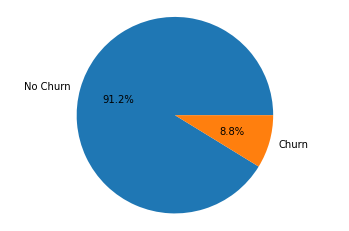

This is a class imbalance problem , which will be later handled using SMOTE technique


In [665]:
#Pie chart for the target variable - Churn
labels = ['No Churn','Churn']
sizes = [df['churn'].value_counts()[0],df['churn'].value_counts()[1]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()
plt.show()
print('This is a class imbalance problem , which will be later handled using SMOTE technique')

**As we have created the desired column 'churn', we can now remove all the columns for month 9 as guided in the problem statement.**

In [666]:
text = '_9'
filtered_9 = list(filter(lambda x: True if text in x else False,list(df.columns)))

In [667]:
filtered_9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [668]:
#Dropping the columns for September
df = df.drop(filtered_9,axis = 1)

In [669]:
#No of columns
df.shape

(29976, 177)

# Step 3: Data Cleaning

In [670]:
null_df = pd.DataFrame(df.isnull().sum()/len(df.index)*100,columns=['C'])
null_df.sort_values(by='C',ascending=False).head(50)

,C
count_rech_2g_8,49.809848
date_of_last_rech_data_8,49.809848
arpu_3g_8,49.809848
fb_user_8,49.809848
arpu_2g_8,49.809848
max_rech_data_8,49.809848
count_rech_3g_8,49.809848
night_pck_user_8,49.809848
date_of_last_rech_data_7,47.641446
max_rech_data_7,47.641446


**As per assignment guidelines** <br>
We will be focusing on usage based churn and these columns are having very high nulls. Hence below featues related to revenue will be dropped.

In [671]:
for  column in df.columns:
    if 'rech' in column:
        print(column)
        df = df.drop(column,axis=1)
    elif 'arpu' in column:
        print(column)
        df = df.drop(column,axis=1)
    elif 'last_date_of_month' in column:
        print(column)
        df = df.drop(column,axis=1)

last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
arpu_6
arpu_7
arpu_8
total_rech_num_6
total_rech_num_7
total_rech_num_8
total_rech_amt_6
total_rech_amt_7
total_rech_amt_8
max_rech_amt_6
max_rech_amt_7
max_rech_amt_8
date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8
total_rech_data_6
total_rech_data_7
total_rech_data_8
max_rech_data_6
max_rech_data_7
max_rech_data_8
count_rech_2g_6
count_rech_2g_7
count_rech_2g_8
count_rech_3g_6
count_rech_3g_7
count_rech_3g_8
av_rech_amt_data_6
av_rech_amt_data_7
av_rech_amt_data_8
arpu_3g_6
arpu_3g_7
arpu_3g_8
arpu_2g_6
arpu_2g_7
arpu_2g_8
voice_recharge_good
data_recharge_good
rech_amt_good


In [672]:
null_df = pd.DataFrame(df.isnull().sum()/len(df.index)*100,columns=['C'])
null_df.sort_values(by='C',ascending=False).head(50)

,C
night_pck_user_8,49.809848
fb_user_8,49.809848
fb_user_7,47.641446
night_pck_user_7,47.641446
night_pck_user_6,47.117694
fb_user_6,47.117694
loc_ic_t2m_mou_8,4.153323
std_og_t2t_mou_8,4.153323
loc_ic_t2f_mou_8,4.153323
loc_og_mou_8,4.153323


**Handling the columns: night_pck_user & fb_user**

In [673]:
df.pivot_table(values = 'night_pck_user_6', 
                      index = 'churn',  
                      aggfunc = 'sum')

,night_pck_user_6
churn,
No,354.0
Yes,36.0


In [674]:
df.pivot_table(values = 'night_pck_user_7', 
                      index = 'churn',  
                      aggfunc = 'sum')

,night_pck_user_7
churn,
No,333.0
Yes,22.0


In [675]:
df.pivot_table(values = 'night_pck_user_8', 
                      index = 'churn',  
                      aggfunc = 'sum')

,night_pck_user_8
churn,
No,320.0
Yes,9.0


**Seeing the night_pck_user in Good & action phases, we conclude that this is not affecting churn much. These columns can be dropped.**

In [676]:
df = df.drop(['night_pck_user_6','night_pck_user_7','night_pck_user_8'],axis=1)

In [677]:
df.shape

(29976, 129)

**Converting Fb_user to categorical columns**

In [678]:
df['fb_user_good'] = df['fb_user_6'] + df['fb_user_7']

In [679]:
df['fb_user_good'].value_counts()

2.0    12305
0.0      685
1.0      323
Name: fb_user_good, dtype: int64

In [680]:
#Converting Fb_user to categorical columns
def fill(x):
    if x==0.0: return 'No'
    elif x>0: return 'Yes'
    else: return 'Unknown'
fb_user_columns = ['fb_user_good','fb_user_8']

for column in fb_user_columns:
    df[column] = df[column].apply(fill)
    df[column] = df[column].astype('str')
    
df['fb_user_good'].value_counts()

Unknown    16663
Yes        12628
No           685
Name: fb_user_good, dtype: int64

In [681]:
df = df.drop(['fb_user_6','fb_user_7'],axis=1)
df = df.rename(columns={'fb_user_8': 'fb_user_action'})

In [682]:
df['fb_user_good'].value_counts()

Unknown    16663
Yes        12628
No           685
Name: fb_user_good, dtype: int64

In [683]:
#Dropping mobile number
df=df.drop('mobile_number',axis=1)

In [684]:
null_df = pd.DataFrame(df.isnull().sum()/len(df.index)*100,columns=['C'])
null_df.sort_values(by='C',ascending=False).head(50)

,C
loc_ic_t2m_mou_8,4.153323
loc_og_t2f_mou_8,4.153323
loc_og_mou_8,4.153323
std_og_t2t_mou_8,4.153323
std_og_t2m_mou_8,4.153323
std_og_t2f_mou_8,4.153323
std_og_t2c_mou_8,4.153323
std_og_mou_8,4.153323
isd_og_mou_8,4.153323
spl_og_mou_8,4.153323


In [685]:
for column in df.select_dtypes(exclude=['object']).columns.to_list():
    median = df[column].median()
    df[column] = df[column].fillna(median)

In [686]:
null_df = pd.DataFrame(df.isnull().sum()/len(df.index)*100,columns=['C'])
null_df.sort_values(by='C',ascending=False).head(50)

,C
circle_id,0.0
std_ic_t2o_mou_7,0.0
isd_ic_mou_8,0.0
isd_ic_mou_7,0.0
isd_ic_mou_6,0.0
spl_ic_mou_8,0.0
spl_ic_mou_7,0.0
spl_ic_mou_6,0.0
total_ic_mou_8,0.0
total_ic_mou_7,0.0


### Understanding Data

circle_id


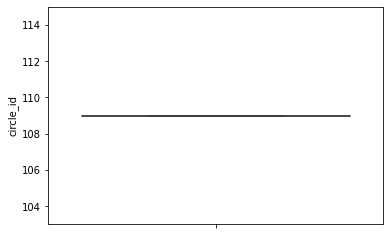

loc_og_t2o_mou


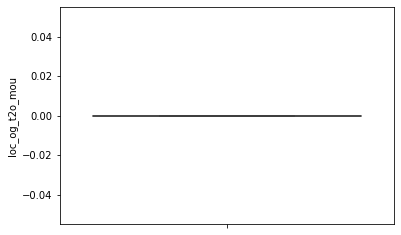

std_og_t2o_mou


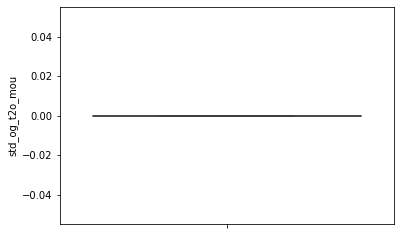

loc_ic_t2o_mou


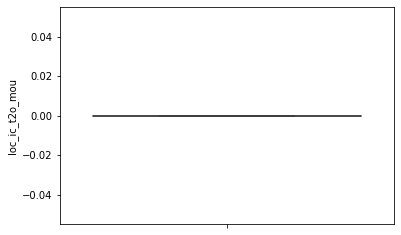

onnet_mou_6


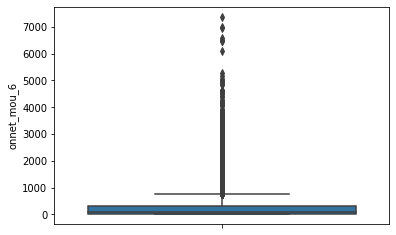

onnet_mou_7


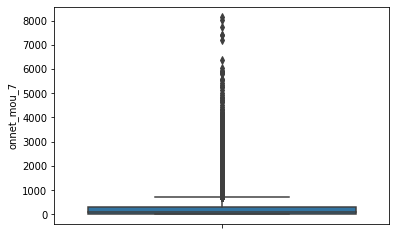

onnet_mou_8


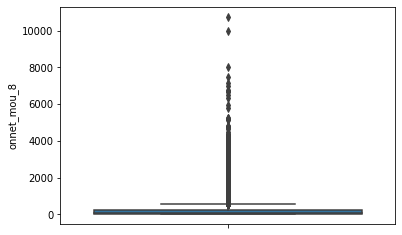

offnet_mou_6


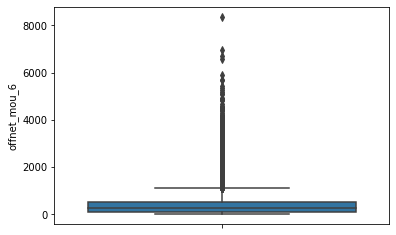

offnet_mou_7


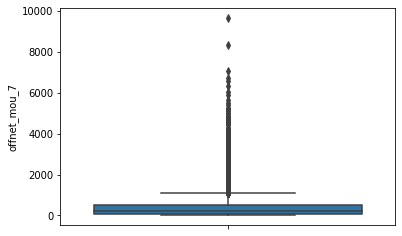

offnet_mou_8


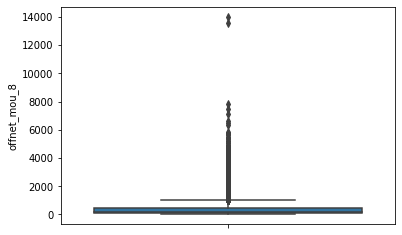

roam_ic_mou_6


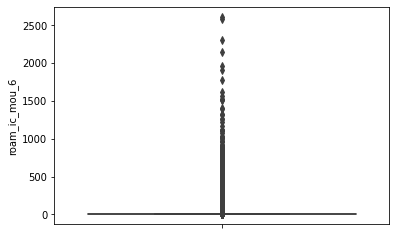

roam_ic_mou_7


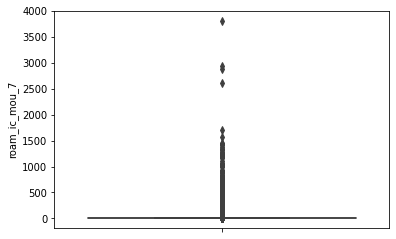

roam_ic_mou_8


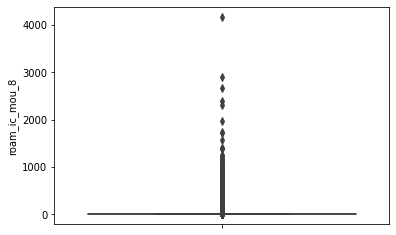

roam_og_mou_6


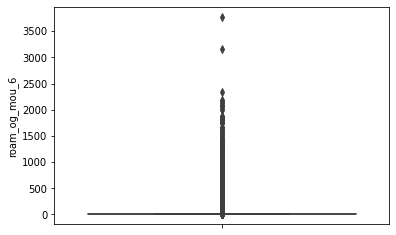

roam_og_mou_7


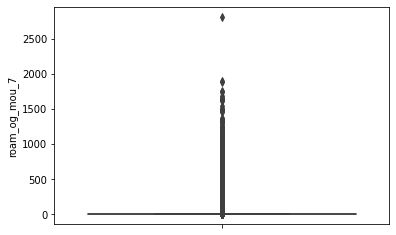

roam_og_mou_8


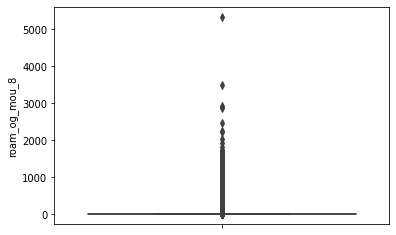

loc_og_t2t_mou_6


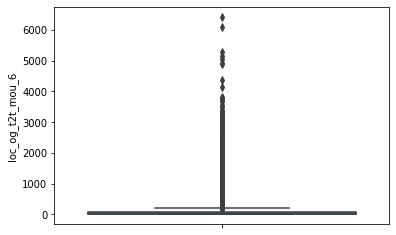

loc_og_t2t_mou_7


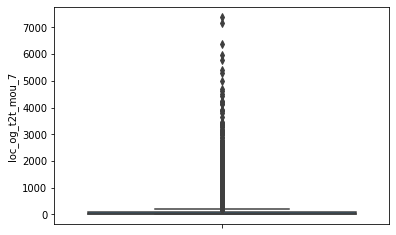

loc_og_t2t_mou_8


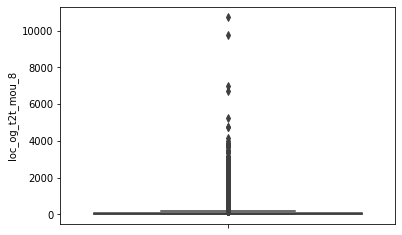

loc_og_t2m_mou_6


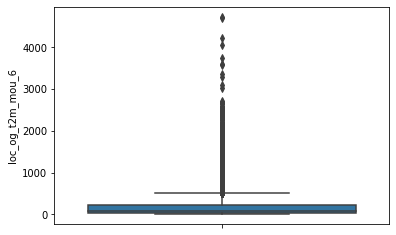

loc_og_t2m_mou_7


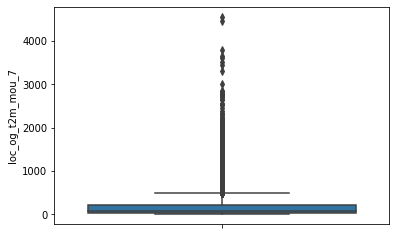

loc_og_t2m_mou_8


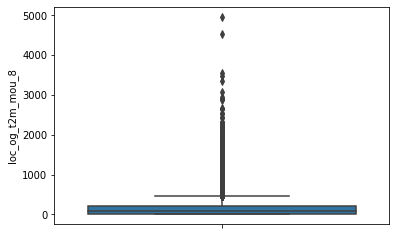

loc_og_t2f_mou_6


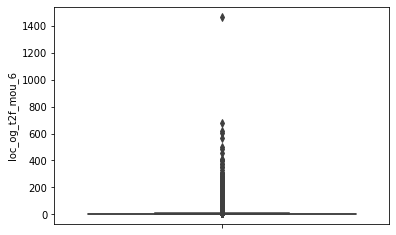

loc_og_t2f_mou_7


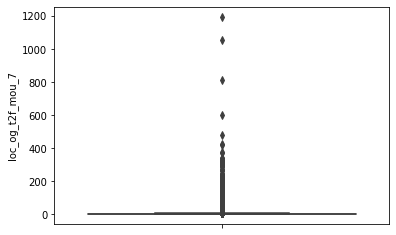

loc_og_t2f_mou_8


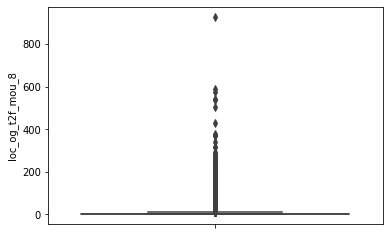

loc_og_t2c_mou_6


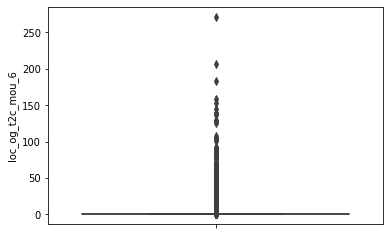

loc_og_t2c_mou_7


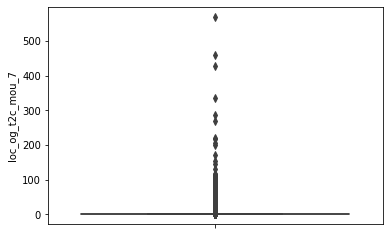

loc_og_t2c_mou_8


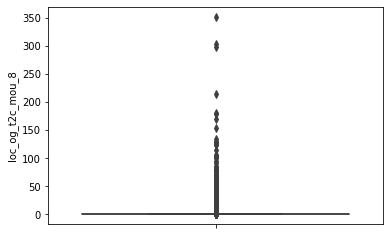

loc_og_mou_6


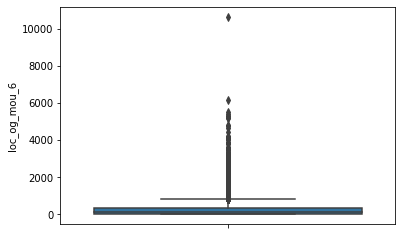

loc_og_mou_7


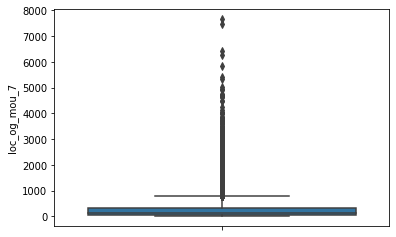

loc_og_mou_8


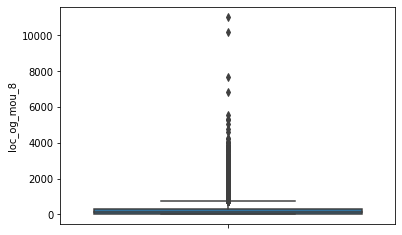

std_og_t2t_mou_6


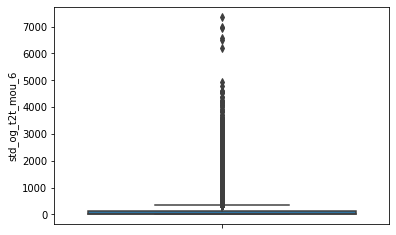

std_og_t2t_mou_7


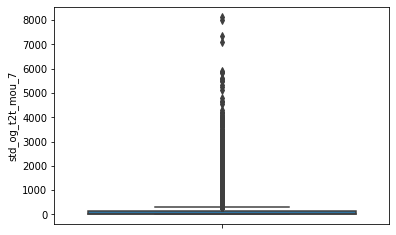

std_og_t2t_mou_8


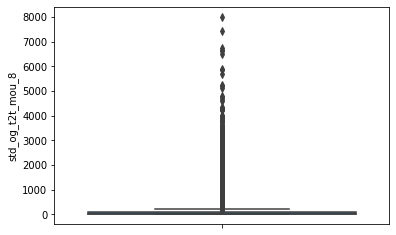

std_og_t2m_mou_6


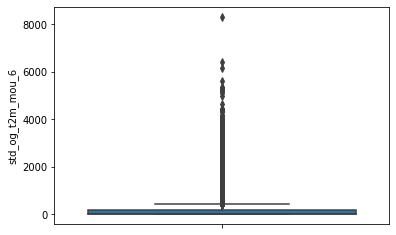

std_og_t2m_mou_7


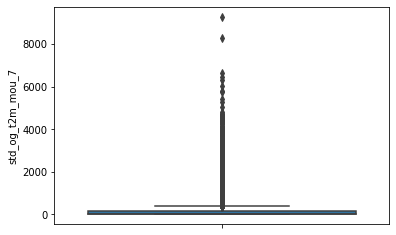

std_og_t2m_mou_8


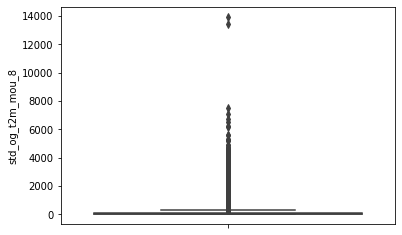

std_og_t2f_mou_6


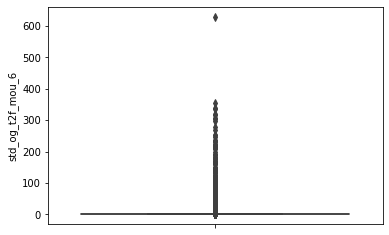

std_og_t2f_mou_7


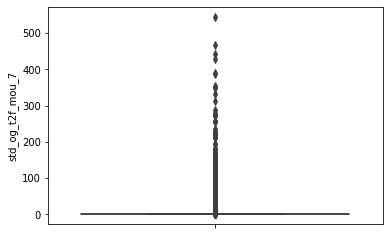

std_og_t2f_mou_8


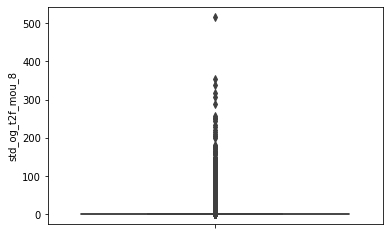

std_og_t2c_mou_6


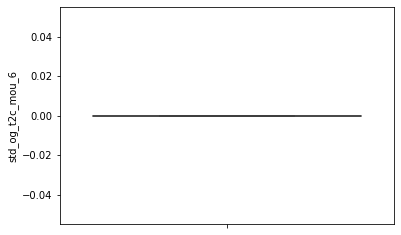

std_og_t2c_mou_7


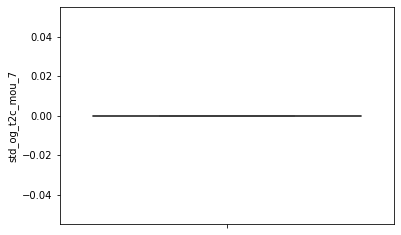

std_og_t2c_mou_8


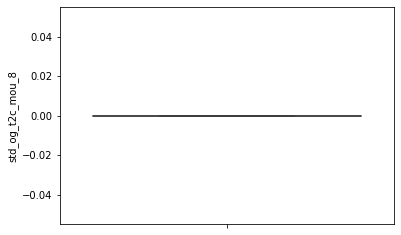

std_og_mou_6


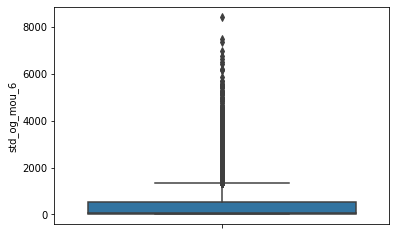

std_og_mou_7


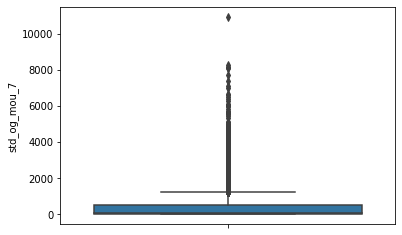

std_og_mou_8


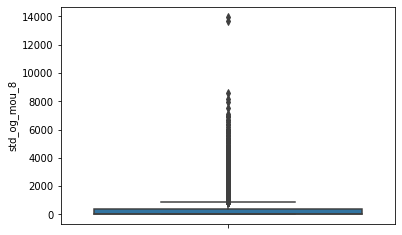

isd_og_mou_6


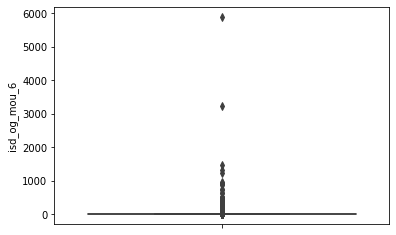

isd_og_mou_7


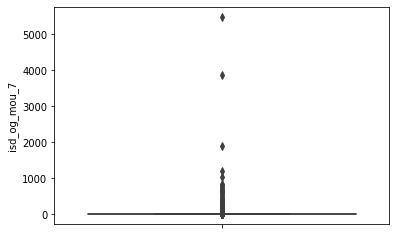

isd_og_mou_8


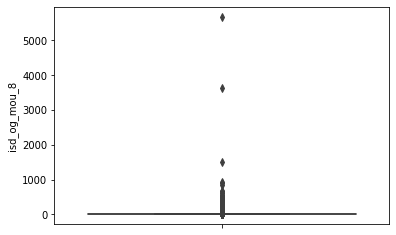

spl_og_mou_6


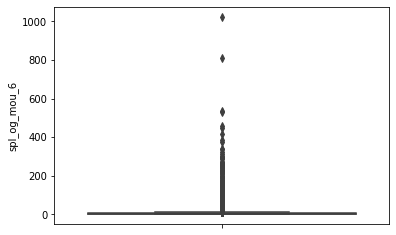

spl_og_mou_7


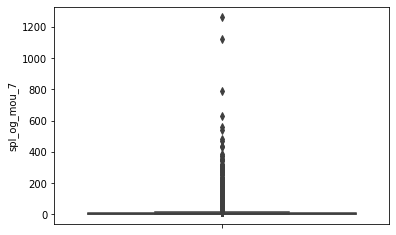

spl_og_mou_8


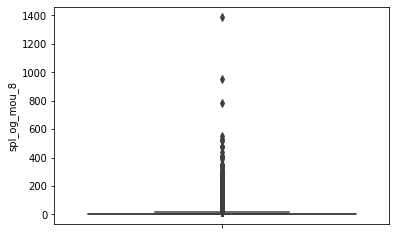

og_others_6


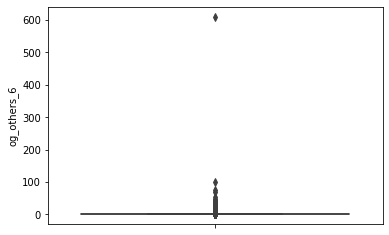

og_others_7


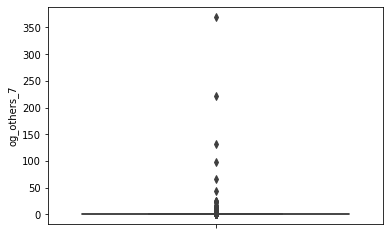

og_others_8


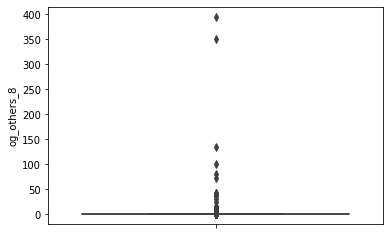

total_og_mou_6


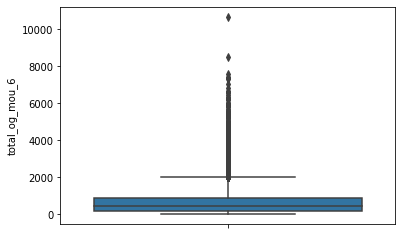

total_og_mou_7


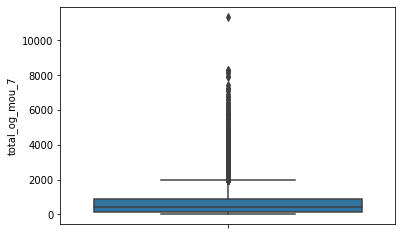

total_og_mou_8


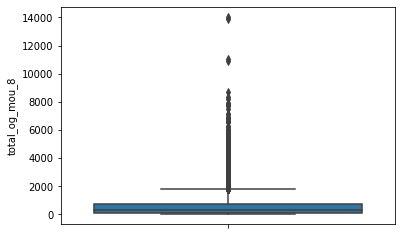

loc_ic_t2t_mou_6


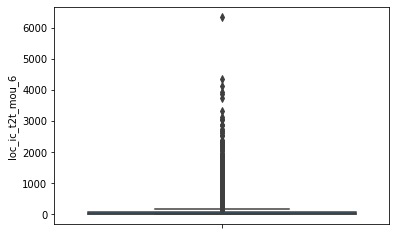

loc_ic_t2t_mou_7


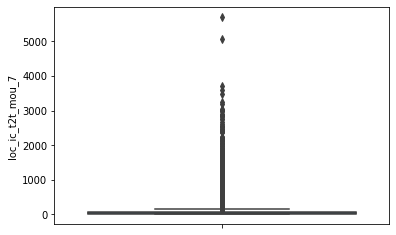

loc_ic_t2t_mou_8


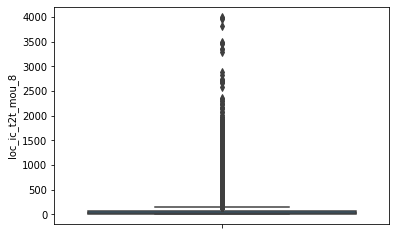

loc_ic_t2m_mou_6


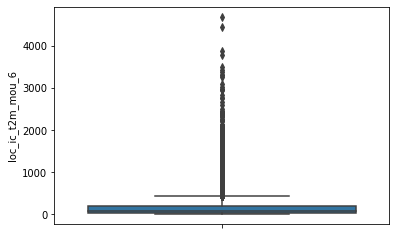

loc_ic_t2m_mou_7


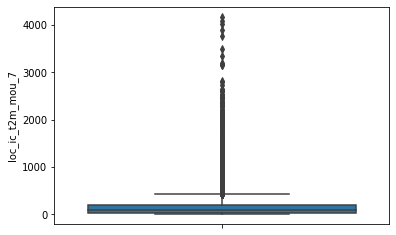

loc_ic_t2m_mou_8


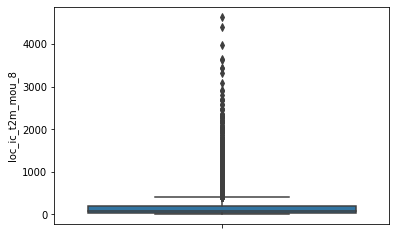

loc_ic_t2f_mou_6


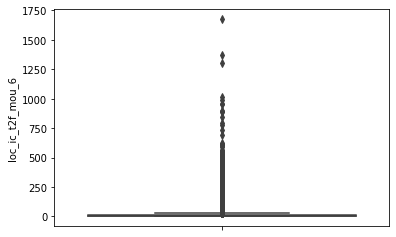

loc_ic_t2f_mou_7


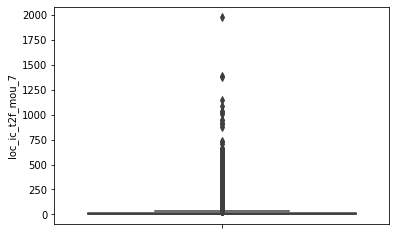

loc_ic_t2f_mou_8


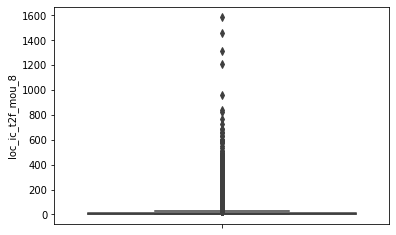

loc_ic_mou_6


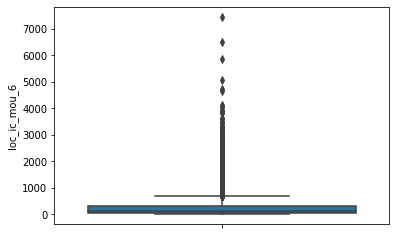

loc_ic_mou_7


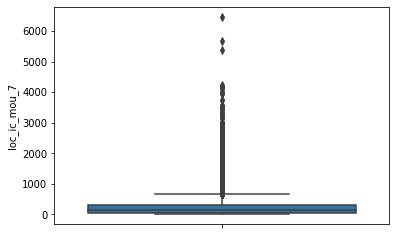

loc_ic_mou_8


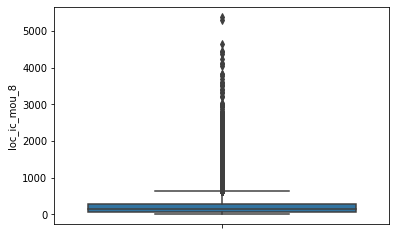

std_ic_t2t_mou_6


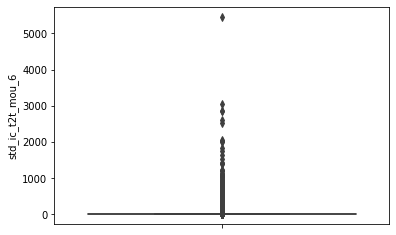

std_ic_t2t_mou_7


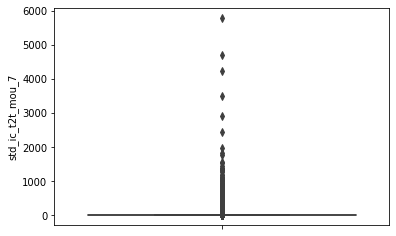

std_ic_t2t_mou_8


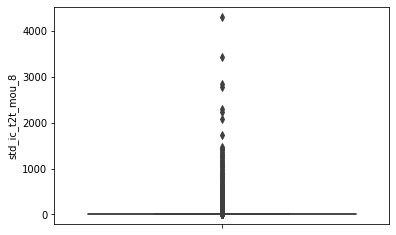

std_ic_t2m_mou_6


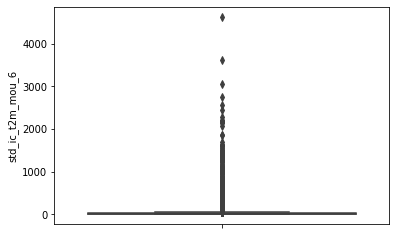

std_ic_t2m_mou_7


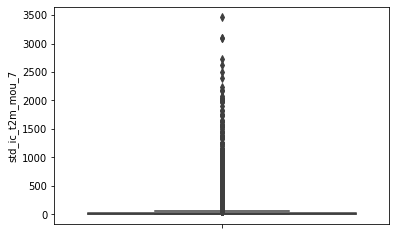

std_ic_t2m_mou_8


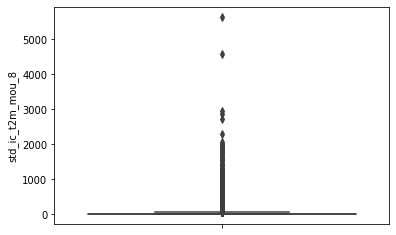

std_ic_t2f_mou_6


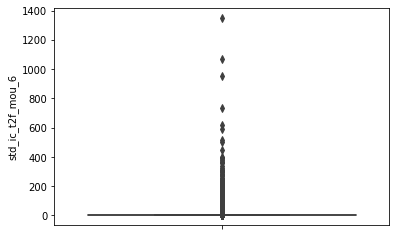

std_ic_t2f_mou_7


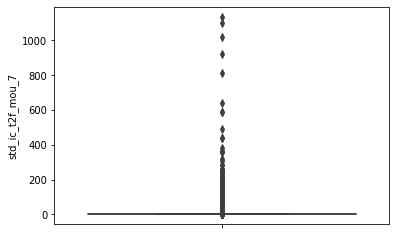

std_ic_t2f_mou_8


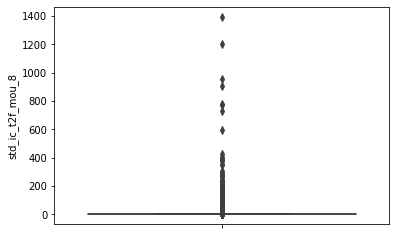

std_ic_t2o_mou_6


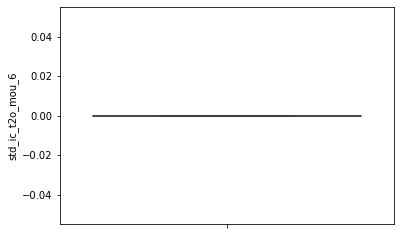

std_ic_t2o_mou_7


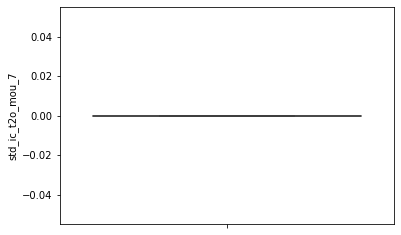

std_ic_t2o_mou_8


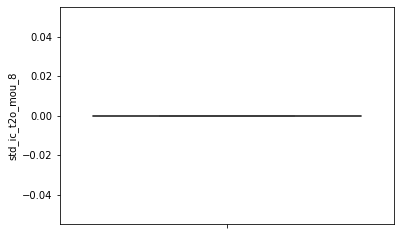

std_ic_mou_6


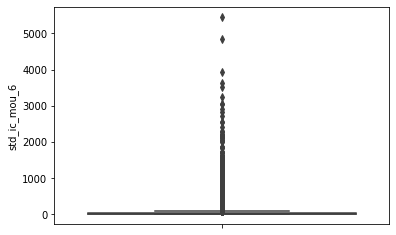

std_ic_mou_7


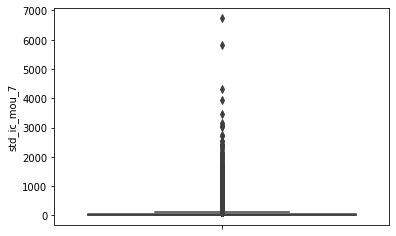

std_ic_mou_8


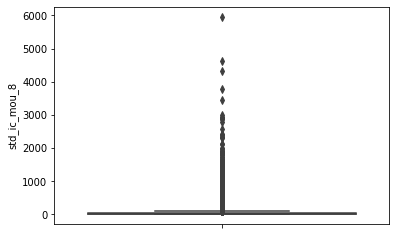

total_ic_mou_6


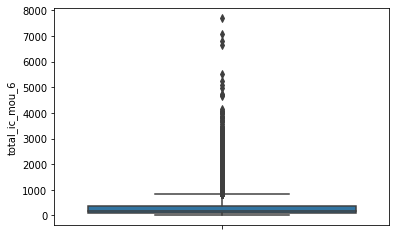

total_ic_mou_7


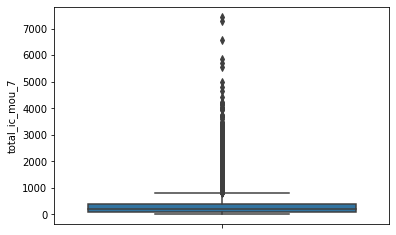

total_ic_mou_8


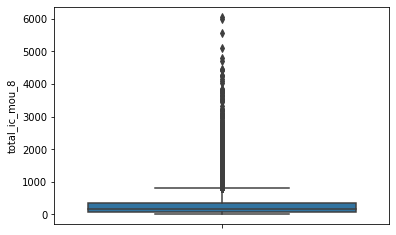

spl_ic_mou_6


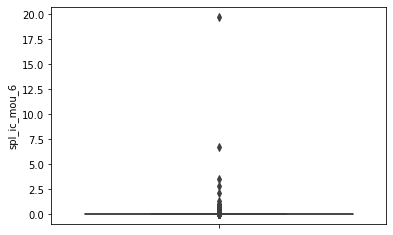

spl_ic_mou_7


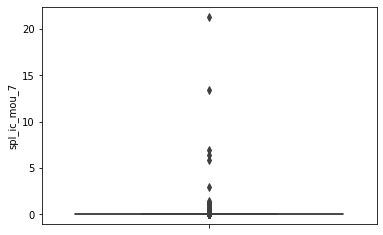

spl_ic_mou_8


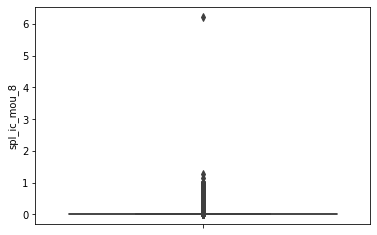

isd_ic_mou_6


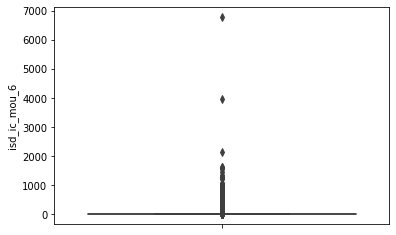

isd_ic_mou_7


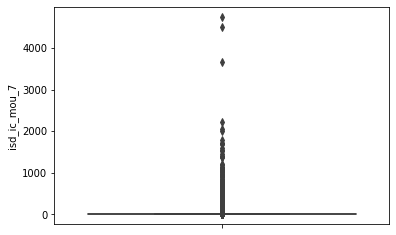

isd_ic_mou_8


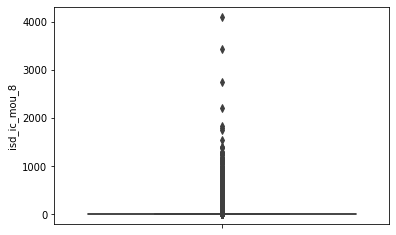

ic_others_6


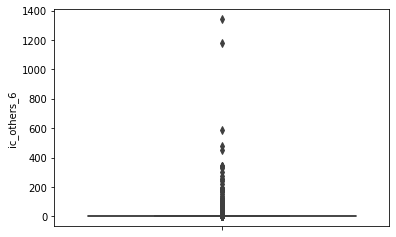

ic_others_7


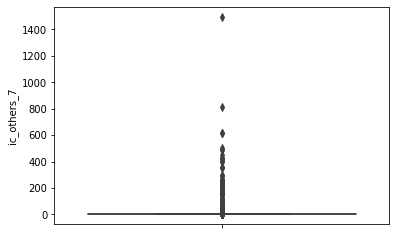

ic_others_8


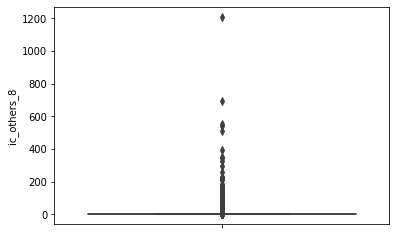

last_day_rch_amt_6


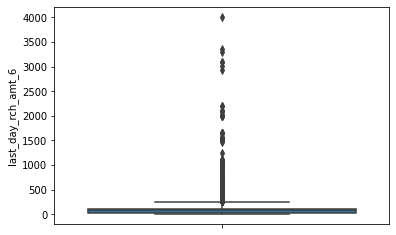

last_day_rch_amt_7


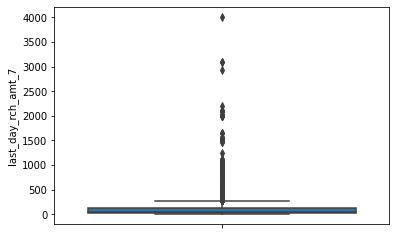

last_day_rch_amt_8


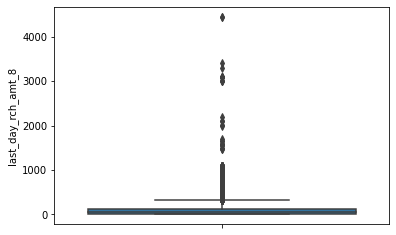

vol_2g_mb_6


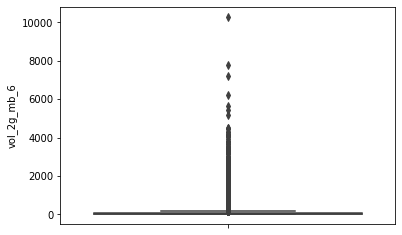

vol_2g_mb_7


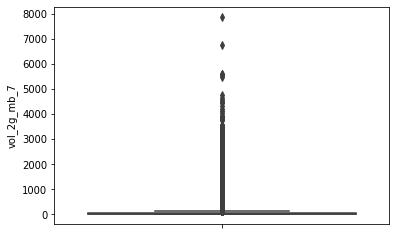

vol_2g_mb_8


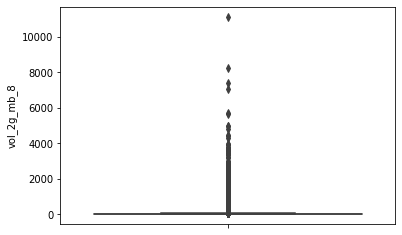

vol_3g_mb_6


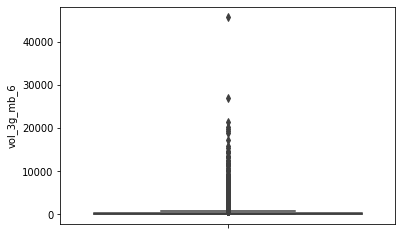

vol_3g_mb_7


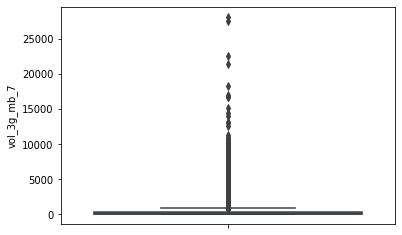

vol_3g_mb_8


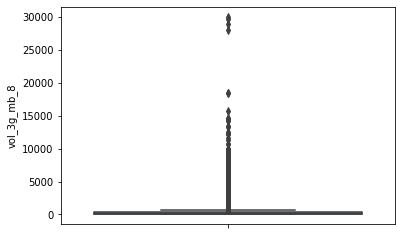

monthly_2g_6


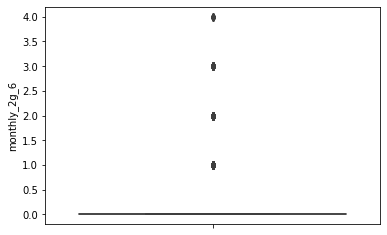

monthly_2g_7


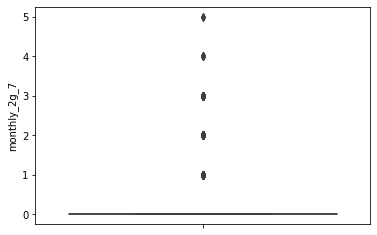

monthly_2g_8


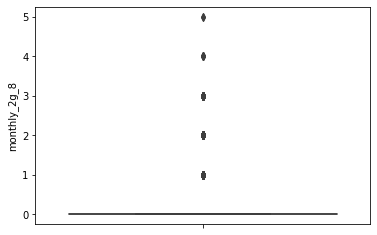

sachet_2g_6


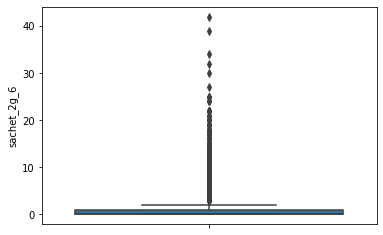

sachet_2g_7


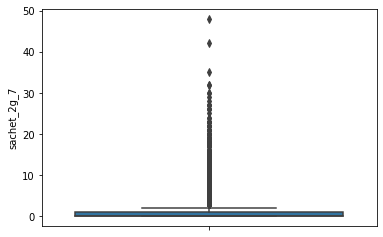

sachet_2g_8


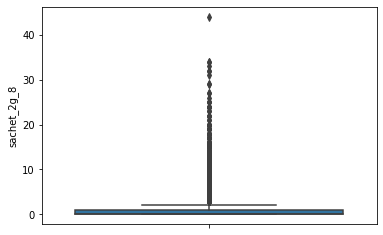

monthly_3g_6


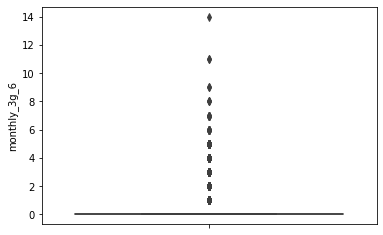

monthly_3g_7


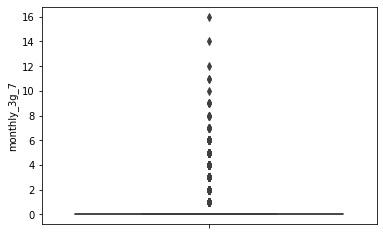

monthly_3g_8


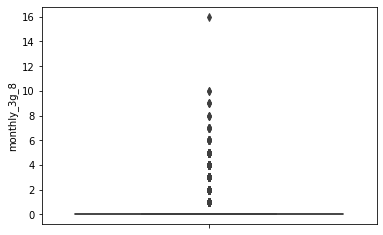

sachet_3g_6


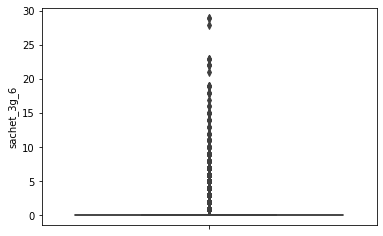

sachet_3g_7


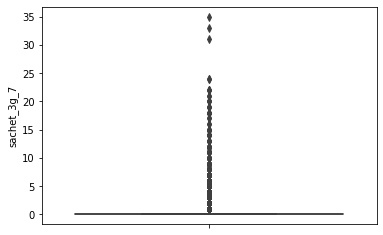

sachet_3g_8


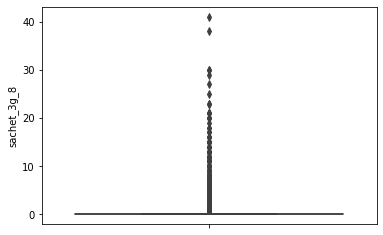

aon


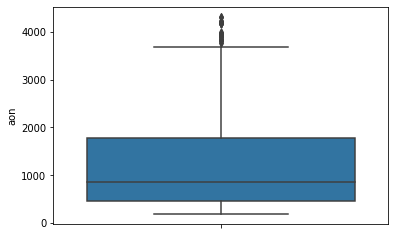

aug_vbc_3g


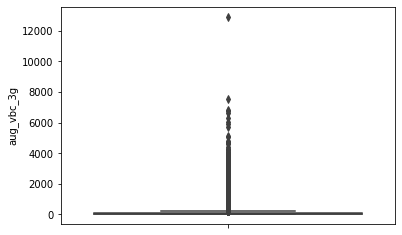

jul_vbc_3g


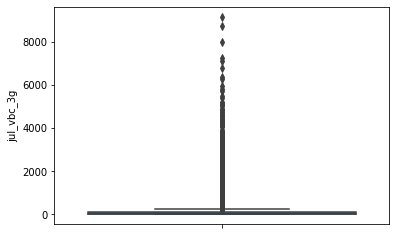

jun_vbc_3g


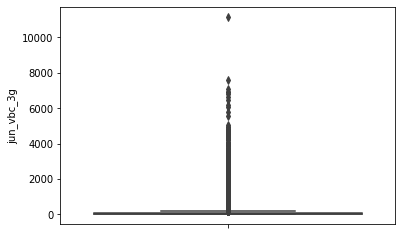

sep_vbc_3g


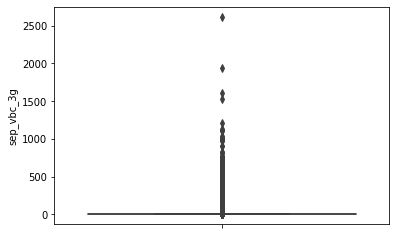

highvalcust


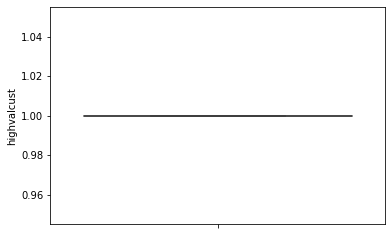

In [687]:
for column in df.select_dtypes(exclude=['object']).columns.to_list():
    print(column)
    sns.boxplot(y=column,data=df)
    plt.show()

As per the above box plot analysis, below columns can be dropped: (They contain same value in all rows)
1. circle_id
2. loc_og_t2o_mou
3. std_og_t2o_mou
4. loc_ic_t2o_mou
5. highvalcust
6. 'std_og_t2c_mou_6'
7. 'std_ic_t2o_mou_6'
8. 'std_og_t2c_mou_7'
9. 'std_ic_t2o_mou_7'
10. 'std_og_t2c_mou_8'
11. 'std_ic_t2o_mou_8'

In [688]:
df = df.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','highvalcust'],axis=1)

In [689]:
zero_col = ['std_og_t2c_mou_6','std_ic_t2o_mou_6','std_og_t2c_mou_7','std_ic_t2o_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_8']

In [690]:
df = df.drop(zero_col,axis=1)

**Combining all the columns of 6 & 7 into new columns for the good phase having avg values.**

In [691]:
for  column in df.select_dtypes(exclude=['object']).columns.to_list():
    if '_6' in column:
        print(column)
        print(df[column].value_counts())
        print()

onnet_mou_6
0.00       1655
102.31      396
0.26         17
0.33         16
1.01         16
           ... 
405.89        1
1671.08       1
639.59        1
102.94        1
2414.04       1
Name: onnet_mou_6, Length: 17585, dtype: int64

offnet_mou_6
0.000       698
253.385     396
0.610        11
2.080         8
0.080         8
           ... 
0.060         1
3517.140      1
2411.160      1
1146.730      1
375.040       1
Name: offnet_mou_6, Length: 21760, dtype: int64

roam_ic_mou_6
0.00      23500
0.86         13
1.01         13
0.53         12
0.30         12
          ...  
47.84         1
12.85         1
35.53         1
166.43        1
22.64         1
Name: roam_ic_mou_6, Length: 4127, dtype: int64

roam_og_mou_6
0.00      23474
0.21         13
0.60         10
0.36          9
1.01          9
          ...  
39.59         1
150.79        1
473.11        1
362.89        1
68.46         1
Name: roam_og_mou_6, Length: 4879, dtype: int64

loc_og_t2t_mou_6
0.00      2829
28.12      396
0

In [692]:
for  column in df.select_dtypes(exclude=['object']).columns.to_list():
    if '_6' in column:
        column = column.replace('_6','')
        df['{}_good'.format(column)] = (df['{}_6'.format(column)] + df['{}_7'.format(column)])/2
        df = df.drop(['{}_6'.format(column),'{}_7'.format(column)],axis=1)

In [693]:
df['VBC_good'] = (df['jul_vbc_3g']+ df['jun_vbc_3g'])/2
df = df.drop(['sep_vbc_3g','jul_vbc_3g','jun_vbc_3g'],axis=1)
df = df.rename(columns={'aug_vbc_3g':'VBC_8'})

In [694]:
df.shape

(29976, 78)

In [695]:
df.columns

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8',
       'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8',
       'fb_user_action', 'aon', 'VBC_8', 'churn', 'fb_user_good',
       'onnet_mou_good', 'offnet_mou_good', 'roam_ic_mou_good',
       'roam_og_mou_good', 'loc_og_t2t_mou_good', 'loc_og_t2m_mou_good',
       'loc_og_t2f_mou_good', 'loc_og_t2c_mou_good', 'loc_og_mou_good',
       'std_og_t2t_mou

In [696]:
df.shape

(29976, 78)

**Outlier Treatment** <br>


In [697]:
categorical_columns=df.select_dtypes(include=['object']).columns.to_list()
continous_columns=df.select_dtypes(exclude=['object']).columns.to_list()

In [698]:
df.shape

(29976, 78)

aon
3651.0

3651    471
2372    190
495     114
494      90
492      73
       ... 
3464      1
3492      1
3643      1
1852      1
1877      1
Name: aon, Length: 3287, dtype: int64


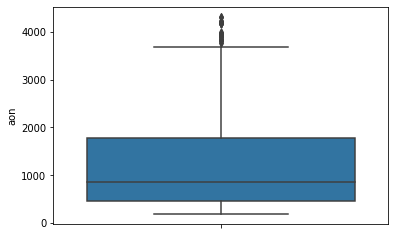

onnet_mou_good
2046.76375

0.000      949
96.990     235
45.835      80
51.155      70
0.125       13
          ... 
78.925       1
74.835       1
142.675      1
220.235      1
46.035       1
Name: onnet_mou_good, Length: 24159, dtype: int64


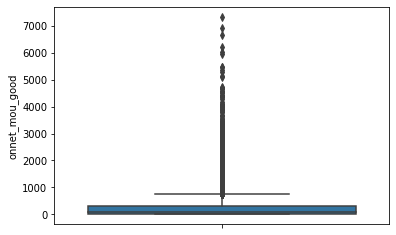

offnet_mou_good
2145.94375

0.0000       331
242.8350     235
116.1425      50
126.6925      34
0.0500         6
            ... 
229.4150       1
1925.7950      1
491.9900       1
534.0400       1
260.2750       1
Name: offnet_mou_good, Length: 27042, dtype: int64


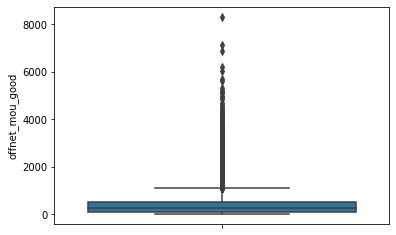

roam_ic_mou_good
279.645

0.000      21069
0.505         25
0.630         15
0.605         14
0.300         12
           ...  
151.160        1
107.920        1
402.145        1
53.115         1
2.500          1
Name: roam_ic_mou_good, Length: 5809, dtype: int64


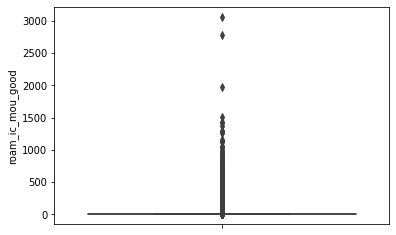

roam_og_mou_good
438.87375

0.000      20991
0.105         11
0.505         11
0.180         10
0.365         10
           ...  
22.230         1
73.970         1
55.670         1
134.270        1
38.795         1
Name: roam_og_mou_good, Length: 6792, dtype: int64


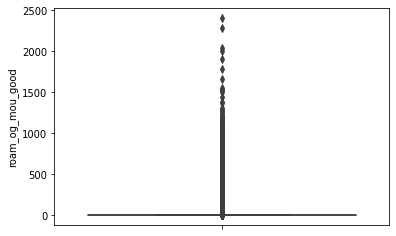

loc_og_t2t_mou_good
995.8975

0.000      1487
27.350      235
13.290       99
14.060       85
0.215        19
           ... 
24.790        1
13.315        1
109.525       1
21.660        1
46.035        1
Name: loc_og_t2t_mou_good, Length: 18559, dtype: int64


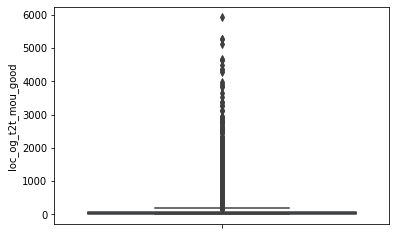

loc_og_t2m_mou_good
1097.6975

0.000      837
85.180     235
41.950      78
43.230      57
0.115        8
          ... 
54.295       1
547.000      1
685.945      1
12.775       1
299.850      1
Name: loc_og_t2m_mou_good, Length: 23684, dtype: int64


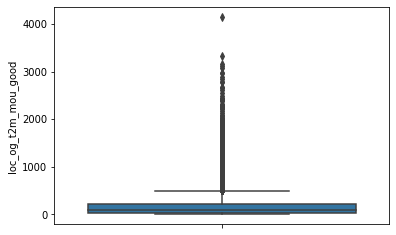

loc_og_t2f_mou_good
86.4025

0.000      10842
0.105        373
0.210        235
0.140         66
0.190         65
           ...  
60.020         1
0.445          1
140.070        1
23.170         1
38.810         1
Name: loc_og_t2f_mou_good, Length: 6328, dtype: int64


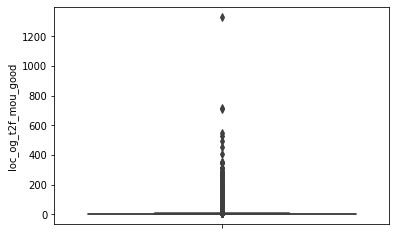

loc_og_t2c_mou_good
22.11375

0.000     18260
0.005        82
0.015        78
0.040        70
0.180        63
          ...  
13.870        1
18.715        1
7.930         1
3.435         1
16.920        1
Name: loc_og_t2c_mou_good, Length: 3124, dtype: int64


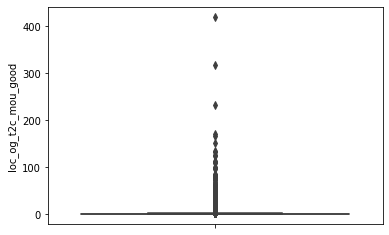

loc_og_mou_good
1678.3275

0.0000      740
138.7900    235
68.4475      75
70.3425      57
0.1250        6
           ... 
14.7950       1
101.0150      1
129.9750      1
236.3000      1
189.1000      1
Name: loc_og_mou_good, Length: 25428, dtype: int64


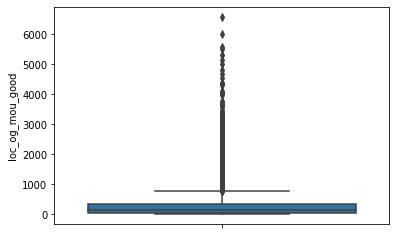

std_og_t2t_mou_good
1761.275

0.0000      9805
4.9325       235
2.1525       163
2.7800       117
0.1650        31
            ... 
25.5250        1
11.5450        1
157.7350       1
224.1750       1
11.7900        1
Name: std_og_t2t_mou_good, Length: 15280, dtype: int64


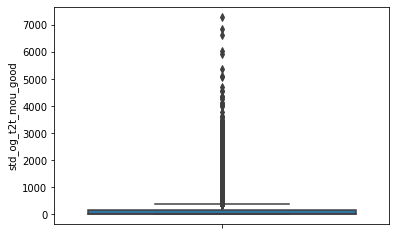

std_og_t2m_mou_good
1851.1124999999997

0.000       5443
21.835       236
10.040       133
11.795        99
0.230         26
            ... 
65.300         1
220.945        1
726.470        1
16.485         1
1695.875       1
Name: std_og_t2m_mou_good, Length: 18134, dtype: int64


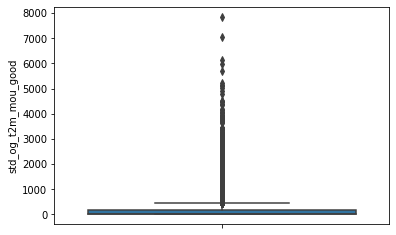

std_og_t2f_mou_good
39.10875

0.000     23321
0.200        36
0.130        34
0.255        33
0.090        32
          ...  
6.615         1
9.830         1
8.770         1
7.955         1
13.505        1
Name: std_og_t2f_mou_good, Length: 2640, dtype: int64


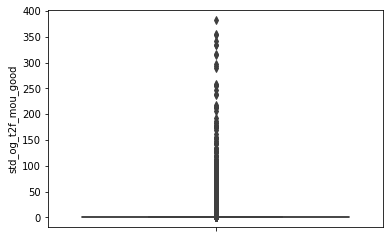

std_og_mou_good
2585.3599999999997

0.0000      4046
64.0925      235
29.0200      112
35.0725       89
0.2300        27
            ... 
294.8950       1
102.6600       1
683.1000       1
175.6550       1
381.9100       1
Name: std_og_mou_good, Length: 20770, dtype: int64


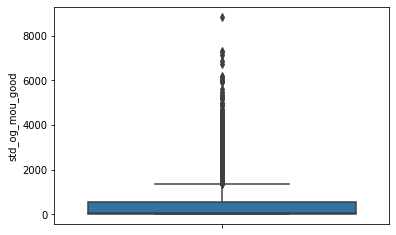

isd_og_mou_good
42.017500000000005

0.000      26408
0.005         71
0.505         64
0.015         50
0.125         44
           ...  
198.320        1
6.195          1
229.200        1
24.220         1
20.200         1
Name: isd_og_mou_good, Length: 1560, dtype: int64


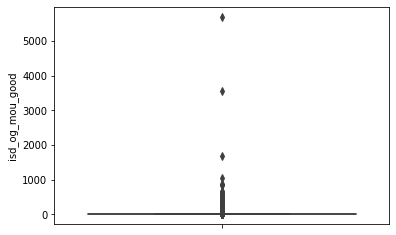

spl_og_mou_good
63.03875000000001

0.000     8390
0.560      236
0.380      191
0.180      145
0.005      102
          ... 
13.290       1
25.190       1
17.740       1
19.770       1
6.005        1
Name: spl_og_mou_good, Length: 6685, dtype: int64


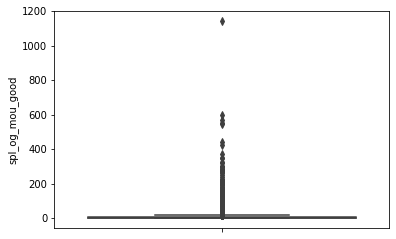

og_others_good
4.7225

0.000     22853
0.105       147
0.215        62
0.325        52
0.100        52
          ...  
2.970         1
12.165        1
5.370         1
37.105        1
3.155         1
Name: og_others_good, Length: 895, dtype: int64


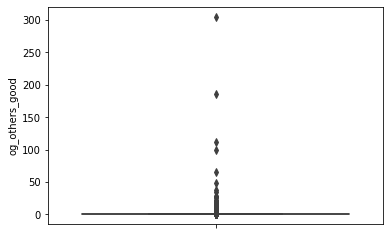

total_og_mou_good
2960.4875

0.000      753
0.105       11
1.580        5
0.980        5
0.505        5
          ... 
56.800       1
150.690      1
39.925       1
459.285      1
548.370      1
Name: total_og_mou_good, Length: 27807, dtype: int64


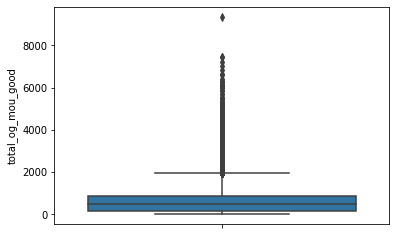

loc_ic_t2t_mou_good
620.12

0.000     831
27.205    235
13.530     85
13.675     66
0.895      15
         ... 
35.480      1
27.895      1
77.350      1
32.565      1
44.115      1
Name: loc_ic_t2t_mou_good, Length: 18284, dtype: int64


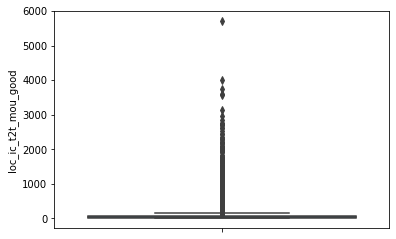

loc_ic_t2m_mou_good
977.09

0.0000      319
89.6175     235
44.7625      53
44.8550      48
4.5100        6
           ... 
456.9950      1
71.3100       1
219.7700      1
667.8700      1
13.7500       1
Name: loc_ic_t2m_mou_good, Length: 24087, dtype: int64


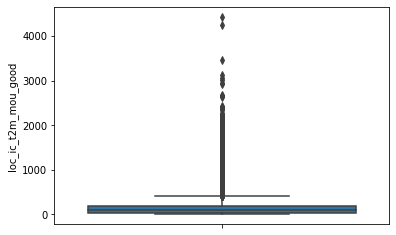

loc_ic_t2f_mou_good
189.375

0.000      6021
2.110       236
1.080       175
1.030       127
0.180        64
           ... 
300.075       1
67.960        1
37.150        1
107.080       1
48.020        1
Name: loc_ic_t2f_mou_good, Length: 9374, dtype: int64


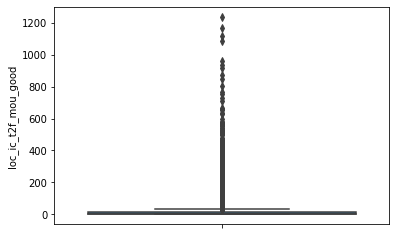

loc_ic_mou_good
1427.4175000000002

0.0000      249
143.2275    235
71.4025      44
71.8250      34
57.8100       5
           ... 
173.4300      1
68.2300       1
133.9850      1
34.1350       1
787.8700      1
Name: loc_ic_mou_good, Length: 25772, dtype: int64


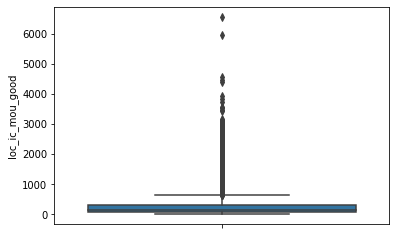

std_ic_t2t_mou_good
200.55375

0.000     9313
0.645      242
0.305      190
0.340      148
0.015       77
          ... 
37.480       1
7.685        1
26.775       1
13.785       1
28.370       1
Name: std_ic_t2t_mou_good, Length: 8581, dtype: int64


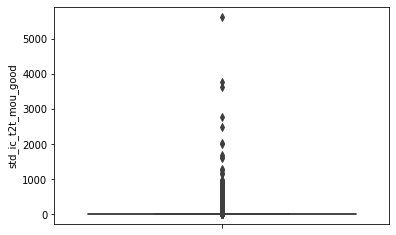

std_ic_t2m_mou_good
373.11125

0.000      4314
5.875       241
2.870       133
3.005       107
0.215        44
           ... 
8.450         1
17.740        1
11.235        1
135.140       1
11.360        1
Name: std_ic_t2m_mou_good, Length: 12395, dtype: int64


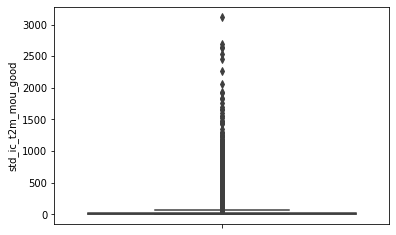

std_ic_t2f_mou_good
46.75

0.000     19058
0.240        73
0.215        67
0.100        64
0.230        63
          ...  
7.870         1
3.015         1
10.695        1
21.110        1
3.385         1
Name: std_ic_t2f_mou_good, Length: 3599, dtype: int64


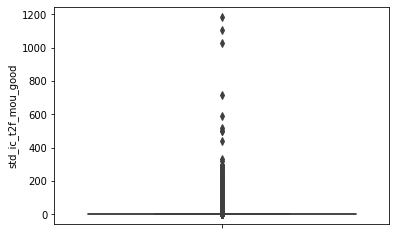

std_ic_mou_good
545.23875

0.000      2413
13.170      236
6.570       109
6.600        91
0.130        34
           ... 
100.410       1
26.905        1
778.890       1
20.840        1
32.415        1
Name: std_ic_mou_good, Length: 15274, dtype: int64


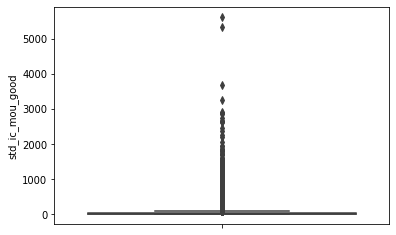

total_ic_mou_good
1684.7675

0.000       483
0.615         6
76.985        6
86.410        5
143.085       4
           ... 
69.620        1
427.480       1
1630.740      1
111.975       1
772.775       1
Name: total_ic_mou_good, Length: 26370, dtype: int64


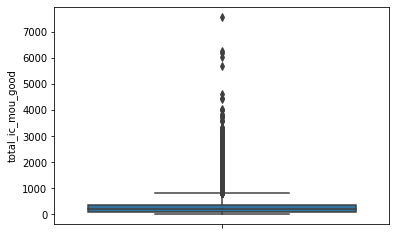

spl_ic_mou_good
0.405

0.000    22612
0.075      620
0.065      293
0.030      276
0.100      251
         ...  
0.635        1
1.480        1
0.525        1
0.545        1
0.425        1
Name: spl_ic_mou_good, Length: 207, dtype: int64


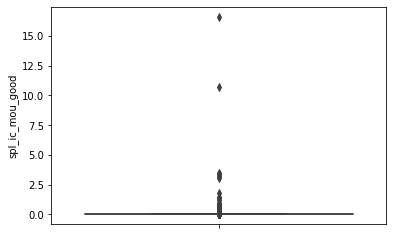

isd_ic_mou_good
227.12

0.000      20609
0.005        159
0.015         94
0.025         83
0.230         61
           ...  
246.780        1
249.995        1
42.560         1
24.780         1
10.505         1
Name: isd_ic_mou_good, Length: 5045, dtype: int64


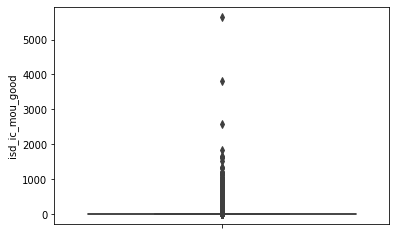

ic_others_good
19.74625

0.000     19223
0.030       193
0.040       192
0.240       180
0.025       179
          ...  
2.315         1
2.445         1
5.830         1
68.630        1
5.000         1
Name: ic_others_good, Length: 2432, dtype: int64


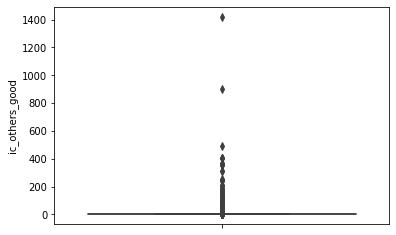

last_day_rch_amt_good
550.0

110.0    1547
0.0      1431
25.0     1278
120.0    1204
55.0     1180
         ... 
547.0       1
341.5       1
263.5       1
204.5       1
515.5       1
Name: last_day_rch_amt_good, Length: 735, dtype: int64


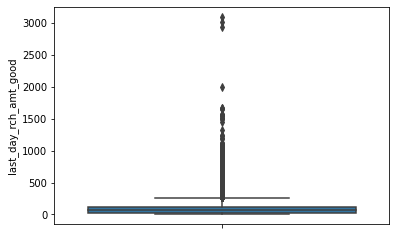

vol_2g_mb_good
1360.9025000000001

0.000      13500
0.005         66
0.010         45
0.020         33
0.015         30
           ...  
83.460         1
575.135        1
213.220        1
199.395        1
27.895         1
Name: vol_2g_mb_good, Length: 13783, dtype: int64


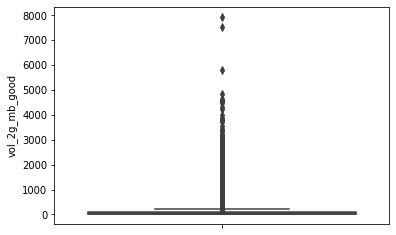

vol_3g_mb_good
3452.82

0.000       17938
0.005          21
0.010           7
0.030           6
0.015           6
            ...  
1577.935        1
819.755         1
674.270         1
666.855         1
440.300         1
Name: vol_3g_mb_good, Length: 11754, dtype: int64


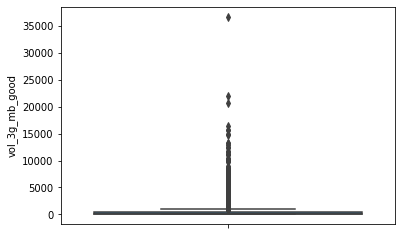

monthly_2g_good
1.5

0.0    24036
0.5     2866
1.0     2215
1.5      745
2.0       89
2.5       17
3.0        6
3.5        1
4.5        1
Name: monthly_2g_good, dtype: int64


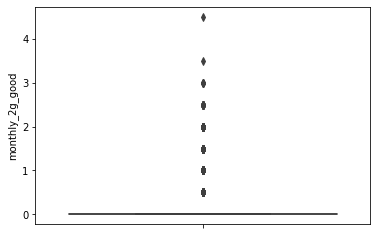

sachet_2g_good
11.0

0.0     19364
0.5      2565
1.0      1593
1.5       951
2.0       750
2.5       567
3.0       514
3.5       468
4.0       441
4.5       382
5.0       367
5.5       287
6.0       267
6.5       194
7.0       179
7.5       136
8.0       134
8.5       116
9.0       115
10.0       87
9.5        82
10.5       70
11.0       59
11.5       49
12.0       40
12.5       38
13.0       33
13.5       17
14.5       16
14.0       15
16.5       11
16.0       11
15.0        8
15.5        7
17.5        7
17.0        5
18.0        4
20.5        3
19.0        3
21.0        3
29.5        2
22.0        2
22.5        2
37.0        1
23.0        1
20.0        1
24.0        1
36.5        1
24.5        1
27.0        1
19.5        1
18.5        1
28.0        1
25.5        1
38.0        1
Name: sachet_2g_good, dtype: int64


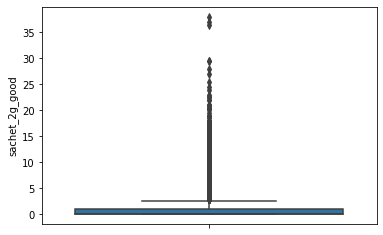

monthly_3g_good
2.5

0.0     24157
0.5      2437
1.0      1723
1.5       934
2.0       338
2.5       148
3.0       102
3.5        44
4.0        25
4.5        21
5.0        14
6.0        10
5.5         8
6.5         4
8.0         3
7.0         3
9.0         2
9.5         1
10.0        1
11.5        1
Name: monthly_3g_good, dtype: int64


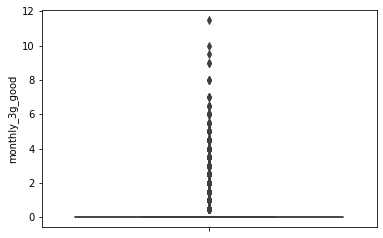

sachet_3g_good
4.0

0.0     25383
0.5      2403
1.0       958
1.5       435
2.0       197
2.5       127
3.0        92
3.5        63
4.0        57
4.5        47
5.0        37
6.0        21
5.5        21
7.0        16
6.5        15
8.0        14
8.5        10
9.5         9
11.0        8
7.5         8
9.0         6
10.0        6
14.5        5
12.0        5
11.5        4
10.5        3
18.5        3
15.0        3
23.5        2
12.5        2
15.5        2
13.5        2
18.0        2
13.0        2
27.0        1
21.5        1
20.5        1
25.0        1
17.0        1
25.5        1
26.5        1
19.5        1
Name: sachet_3g_good, dtype: int64


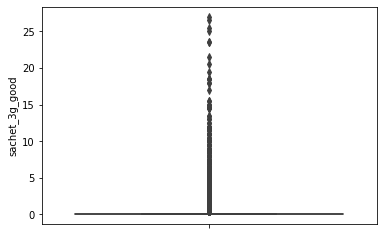

VBC_good
1822.8799999999999

0.000      18773
0.015          6
0.010          5
0.545          4
0.075          4
           ...  
560.670        1
512.780        1
19.470         1
270.160        1
637.885        1
Name: VBC_good, Length: 10805, dtype: int64


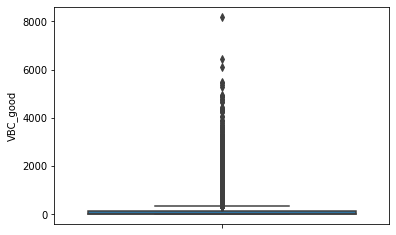

In [699]:
continous_columns=df.select_dtypes(exclude=['object']).columns.to_list()
good = list(filter(lambda x: True if '_8' not in x else False, continous_columns))
for column in good:
    print(column)
    print(df[column].quantile(.99))
    print()
    
    print(df[column].value_counts())
    sns.boxplot(y=column,data=df)
    plt.show()

In [700]:
df.shape

(29976, 78)

In [701]:
df.shape

(29976, 78)

**Creating Derived Columns: Diff = Action - Good** <br>


In [702]:
date_columns=df.select_dtypes(exclude=['object']).columns.to_list()
for  column in date_columns:
    if '_good' in column:
        column = column.replace('_good','')
        df['{}_diff'.format(column)] = df['{}_8'.format(column)] - df['{}_good'.format(column)]
        df = df.drop('{}_8'.format(column),axis=1)
        df = df.drop('{}_good'.format(column),axis=1)

In [703]:
df.shape

(29976, 41)

In [704]:
date_columns=df.select_dtypes(exclude=['object']).columns.to_list()
for  column in date_columns:
    if '_diff' in column:
        column = column.replace('_diff','')
        df['{}_drop'.format(column)] = df['{}_diff'.format(column)].apply(lambda x: 1 if x<0 else 0)
        df = df.drop('{}_diff'.format(column),axis=1)

In [705]:
#Step 1 Improvement
#df = df.drop(['monthly_2g_diff', 'sachet_2g_diff','monthly_3g_diff', 'sachet_3g_diff'],axis=1)

In [706]:
#Step 2 Improvement
#df= df.drop(['roam_ic_mou_diff', 'roam_og_mou_diff','loc_og_t2c_mou_diff', 'std_og_t2f_mou_diff','isd_og_mou_diff','og_others_diff'],axis=1)

In [707]:
df.columns

Index(['fb_user_action', 'aon', 'churn', 'fb_user_good', 'onnet_mou_drop',
       'offnet_mou_drop', 'roam_ic_mou_drop', 'roam_og_mou_drop',
       'loc_og_t2t_mou_drop', 'loc_og_t2m_mou_drop', 'loc_og_t2f_mou_drop',
       'loc_og_t2c_mou_drop', 'loc_og_mou_drop', 'std_og_t2t_mou_drop',
       'std_og_t2m_mou_drop', 'std_og_t2f_mou_drop', 'std_og_mou_drop',
       'isd_og_mou_drop', 'spl_og_mou_drop', 'og_others_drop',
       'total_og_mou_drop', 'loc_ic_t2t_mou_drop', 'loc_ic_t2m_mou_drop',
       'loc_ic_t2f_mou_drop', 'loc_ic_mou_drop', 'std_ic_t2t_mou_drop',
       'std_ic_t2m_mou_drop', 'std_ic_t2f_mou_drop', 'std_ic_mou_drop',
       'total_ic_mou_drop', 'spl_ic_mou_drop', 'isd_ic_mou_drop',
       'ic_others_drop', 'last_day_rch_amt_drop', 'vol_2g_mb_drop',
       'vol_3g_mb_drop', 'monthly_2g_drop', 'sachet_2g_drop',
       'monthly_3g_drop', 'sachet_3g_drop', 'VBC_drop'],
      dtype='object')

**Plotting Continuous variables vs churn column**

In [708]:
df['churn'].value_counts()

No     27350
Yes     2626
Name: churn, dtype: int64

In [709]:
con=df.select_dtypes(exclude=['object']).columns.to_list()
cat=df.select_dtypes(include=['object']).columns.to_list()

In [710]:
cat

['fb_user_action', 'churn', 'fb_user_good']

In [711]:
# Corelation of Data
#plt.figure(figsize = (30, 30))
#sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
#plt.show()

**Findings from Bivariate Analysis:**
1. loc_og_mou_diff
<200, highly likely to churn

2. std_og_t2t_mou_diff
<10, highly likely to churn

3. Drop in usage for most columns is not able to tell about churn. 

4. Significant increase in usage from good phase to action phase is highly indicative of No Churn, as it will be a happy customer.

# Step : Data Preparation

### Dummy Variable Creation

In [712]:
categorical_columns

['fb_user_action', 'churn', 'fb_user_good']

In [713]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
dummy = pd.get_dummies(df[categorical_columns],drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,dummy],axis=1)

In [714]:
df = df.drop(categorical_columns,axis = 1)

In [715]:
df.columns

Index(['aon', 'onnet_mou_drop', 'offnet_mou_drop', 'roam_ic_mou_drop',
       'roam_og_mou_drop', 'loc_og_t2t_mou_drop', 'loc_og_t2m_mou_drop',
       'loc_og_t2f_mou_drop', 'loc_og_t2c_mou_drop', 'loc_og_mou_drop',
       'std_og_t2t_mou_drop', 'std_og_t2m_mou_drop', 'std_og_t2f_mou_drop',
       'std_og_mou_drop', 'isd_og_mou_drop', 'spl_og_mou_drop',
       'og_others_drop', 'total_og_mou_drop', 'loc_ic_t2t_mou_drop',
       'loc_ic_t2m_mou_drop', 'loc_ic_t2f_mou_drop', 'loc_ic_mou_drop',
       'std_ic_t2t_mou_drop', 'std_ic_t2m_mou_drop', 'std_ic_t2f_mou_drop',
       'std_ic_mou_drop', 'total_ic_mou_drop', 'spl_ic_mou_drop',
       'isd_ic_mou_drop', 'ic_others_drop', 'last_day_rch_amt_drop',
       'vol_2g_mb_drop', 'vol_3g_mb_drop', 'monthly_2g_drop', 'sachet_2g_drop',
       'monthly_3g_drop', 'sachet_3g_drop', 'VBC_drop',
       'fb_user_action_Unknown', 'fb_user_action_Yes', 'churn_Yes',
       'fb_user_good_Unknown', 'fb_user_good_Yes'],
      dtype='object')

In [716]:
df = df.rename(columns={'churn_Yes': 'churn'})

### Splitting Data into Training and Test Sets

In [717]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop(['churn'],axis=1)

# Putting response variable to y
y = df['churn']

y.head()

0     1
7     1
8     0
16    0
17    0
Name: churn, dtype: uint8

In [718]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100, stratify = y)

In [719]:
y_train.value_counts()/len(y_train.index)*100

0    91.240528
1     8.759472
Name: churn, dtype: float64

In [720]:
y_test.value_counts()/len(y_test.index)*100

0    91.237629
1     8.762371
Name: churn, dtype: float64

**Hence, the stratified has worked properly during train_test_split**

### Feature Standardisation

In [721]:
from sklearn.preprocessing import MinMaxScaler

In [722]:
scaler = MinMaxScaler()

In [723]:
continous_columns=X_train.select_dtypes(exclude=['object']).columns.to_list()

In [724]:
# Apply scaler() to all the numeric columns
X_train[continous_columns] = scaler.fit_transform(X_train[continous_columns])

In [725]:
X_test[continous_columns] = scaler.transform(X_test[continous_columns])

In [726]:
X_train.head()

,aon,onnet_mou_drop,offnet_mou_drop,roam_ic_mou_drop,roam_og_mou_drop,loc_og_t2t_mou_drop,loc_og_t2m_mou_drop,loc_og_t2f_mou_drop,loc_og_t2c_mou_drop,loc_og_mou_drop,...,vol_3g_mb_drop,monthly_2g_drop,sachet_2g_drop,monthly_3g_drop,sachet_3g_drop,VBC_drop,fb_user_action_Unknown,fb_user_action_Yes,fb_user_good_Unknown,fb_user_good_Yes
68024,0.074620,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
78728,0.288336,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
36435,0.053369,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
90044,0.091041,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
19651,0.121951,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### SMOTE for Data Balancing

In [727]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

In [728]:
X_train_SMOTE.shape

(38290, 42)

In [729]:
y_train_SMOTE.value_counts()

1    19145
0    19145
Name: churn, dtype: int64

In [730]:
X_train_SMOTE = X_train
y_train_SMOTE = y_train

**Hence, the SMOTE technique has led to a balanced class - churn in our dataset.**

**Now we proceed to the Modelling phase.**

# Step : Interpretable Model

In [731]:
import statsmodels.api as sm

### Feature Selection Using RFE

In [732]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train_SMOTE,y_train_SMOTE)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[ True False False False  True False False False False False  True  True
 False  True False False False  True False  True False  True  True False
  True False  True False False False  True  True False  True False False
  True  True  True  True  True  True]
[ 1  6 13 20  1  9 10  5 15  2  1  1  4  1  3 11 12  1  8  1 17  1  1 19
  1 16  1 14 18 22  1  1  7  1 23 21  1  1  1  1  1  1]


In [733]:
# Variables selected by RFE 
col = X_train_SMOTE.columns[rfe.support_]

In [734]:
print(col)

Index(['aon', 'roam_og_mou_drop', 'std_og_t2t_mou_drop', 'std_og_t2m_mou_drop',
       'std_og_mou_drop', 'total_og_mou_drop', 'loc_ic_t2m_mou_drop',
       'loc_ic_mou_drop', 'std_ic_t2t_mou_drop', 'std_ic_t2f_mou_drop',
       'total_ic_mou_drop', 'last_day_rch_amt_drop', 'vol_2g_mb_drop',
       'monthly_2g_drop', 'sachet_3g_drop', 'VBC_drop',
       'fb_user_action_Unknown', 'fb_user_action_Yes', 'fb_user_good_Unknown',
       'fb_user_good_Yes'],
      dtype='object')


In [735]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train_SMOTE[col]

In [736]:
X_train_rfe.shape

(20983, 20)

In [737]:
import statsmodels.api as sm
def getModel(df):
    # Add a constant
    X_train_lm = sm.add_constant(df)
    #Training model
    lr = sm.GLM(y_train, X_train_lm).fit()
    print(lr.summary())
    return lr, X_train_lm

In [738]:
# Method to calculate VIF.
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(df):
    vif = pd.DataFrame()
    X = df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [739]:
#Generating model
lr=getModel(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20983
Model:                            GLM   Df Residuals:                    20962
Model Family:                Gaussian   Df Model:                           20
Link Function:               identity   Scale:                        0.068674
Method:                          IRLS   Log-Likelihood:                -1662.8
Date:                Mon, 22 Feb 2021   Deviance:                       1439.5
Time:                        06:41:08   Pearson chi2:                 1.44e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [740]:
X_train_rfe = X_train_rfe.drop('fb_user_good_Unknown',axis = 1)

In [741]:
#Generating model
lr=getModel(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20983
Model:                            GLM   Df Residuals:                    20963
Model Family:                Gaussian   Df Model:                           19
Link Function:               identity   Scale:                        0.068680
Method:                          IRLS   Log-Likelihood:                -1664.3
Date:                Mon, 22 Feb 2021   Deviance:                       1439.7
Time:                        06:41:08   Pearson chi2:                 1.44e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [742]:
X_train_rfe = X_train_rfe.drop('fb_user_good_Yes',axis = 1)

In [743]:
lr=getModel(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20983
Model:                            GLM   Df Residuals:                    20964
Model Family:                Gaussian   Df Model:                           18
Link Function:               identity   Scale:                        0.068678
Method:                          IRLS   Log-Likelihood:                -1664.5
Date:                Mon, 22 Feb 2021   Deviance:                       1439.8
Time:                        06:41:08   Pearson chi2:                 1.44e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [744]:
#Geting VIF
cal_vif(X_train_rfe)

,Features,VIF
7,loc_ic_mou_drop,6.80
4,std_og_mou_drop,6.06
10,total_ic_mou_drop,5.20
6,loc_ic_t2m_mou_drop,4.81
3,std_og_t2m_mou_drop,4.32
5,total_og_mou_drop,3.60
16,fb_user_action_Unknown,3.47
17,fb_user_action_Yes,3.17
2,std_og_t2t_mou_drop,2.79
8,std_ic_t2t_mou_drop,2.20


In [747]:
X_train_rfe = X_train_rfe.drop('loc_ic_mou_drop',axis = 1)

KeyError: "['loc_ic_mou_drop'] not found in axis"

In [746]:
lr=getModel(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20983
Model:                            GLM   Df Residuals:                    20965
Model Family:                Gaussian   Df Model:                           17
Link Function:               identity   Scale:                        0.068905
Method:                          IRLS   Log-Likelihood:                -1699.6
Date:                Mon, 22 Feb 2021   Deviance:                       1444.6
Time:                        06:41:21   Pearson chi2:                 1.44e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [748]:
#Geting VIF
cal_vif(X_train_rfe)

,Features,VIF
4,std_og_mou_drop,6.06
3,std_og_t2m_mou_drop,4.31
9,total_ic_mou_drop,3.78
5,total_og_mou_drop,3.60
15,fb_user_action_Unknown,3.47
6,loc_ic_t2m_mou_drop,3.24
16,fb_user_action_Yes,3.16
2,std_og_t2t_mou_drop,2.79
7,std_ic_t2t_mou_drop,2.19
0,aon,2.10


### Finding the Optimal Cutoff Point

In [749]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train_rfe, y_train_SMOTE)

LogisticRegression()

In [750]:
X_test_rfe = X_test[X_train_rfe.columns]

In [751]:
X_train_rfe.shape

(20983, 17)

In [752]:
# Predicted probabilities
y_pred_train = logsk.predict_proba(X_train_rfe)
# Converting y_pred to a dataframe which is an array
y_pred_train_df = pd.DataFrame(y_pred_train)
# Converting to column dataframe
y_pred_train_1 = y_pred_train_df.iloc[:,[1]]
# Let's see the head
y_pred_train_1.head()

,1
0,0.075648
1,0.007973
2,0.420466
3,0.034100
4,0.033562


In [753]:
y_pred_train

array([[0.92435227, 0.07564773],
       [0.99202748, 0.00797252],
       [0.57953355, 0.42046645],
       ...,
       [0.95831805, 0.04168195],
       [0.91178791, 0.08821209],
       [0.99616351, 0.00383649]])

In [754]:
# Converting y_train to dataframe
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

,churn
68024,0
78728,0
36435,1
90044,0
19651,0


In [755]:
# Removing index for both dataframes to append them side by side 
y_pred_train_1.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_train_final = pd.concat([y_train_df,y_pred_train_1],axis=1)
# Renaming the column 
y_pred_train_final= y_pred_train_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_train_final.head()

,churn,Churn_Prob
0,0,0.075648
1,0,0.007973
2,1,0.420466
3,0,0.034100
4,0,0.033562


In [756]:
y_pred_train_final['churn'].value_counts()

0    19145
1     1838
Name: churn, dtype: int64

#### Finding Optimal Cutoff Point

In [757]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_train_final[i]= y_pred_train_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_pred_train_final.head()

,churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.075648,1,0,0,0,0,0,0,0,0,0
1,0,0.007973,1,0,0,0,0,0,0,0,0,0
2,1,0.420466,1,1,1,1,1,0,0,0,0,0
3,0,0.034100,1,0,0,0,0,0,0,0,0,0
4,0,0.033562,1,0,0,0,0,0,0,0,0,0


In [758]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_train_final.churn, y_pred_train_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.087595  1.000000  0.000000
0.1   0.1  0.785445  0.763330  0.787569
0.2   0.2  0.875947  0.599021  0.902533
0.3   0.3  0.903922  0.448857  0.947610
0.4   0.4  0.914979  0.260609  0.977801
0.5   0.5  0.916075  0.112622  0.993210
0.6   0.6  0.914264  0.036453  0.998537
0.7   0.7  0.912739  0.008161  0.999582
0.8   0.8  0.912453  0.000544  1.000000
0.9   0.9  0.912405  0.000000  1.000000


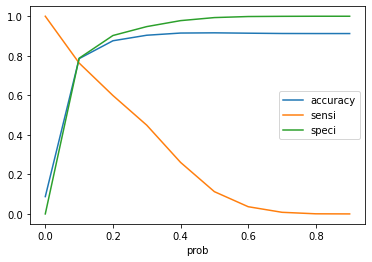

In [759]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.1 is the optimum point to take as a cutoff probability. This is because we need to maximize our sensitivity.

### Making Predictions

In [760]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test_rfe)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.024881
1,0.021649
2,0.042229
3,0.344132
4,0.314615


In [761]:
y_pred

array([[0.97511888, 0.02488112],
       [0.97835137, 0.02164863],
       [0.95777121, 0.04222879],
       ...,
       [0.90371821, 0.09628179],
       [0.94456344, 0.05543656],
       [0.75401463, 0.24598537]])

In [762]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
61977,0
56530,0
4672,0
85889,1
94724,0


In [763]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,churn,Churn_Prob
0,0,0.024881
1,0,0.021649
2,0,0.042229
3,1,0.344132
4,0,0.314615


In [764]:
y_pred_final['churn'].value_counts()

0    8205
1     788
Name: churn, dtype: int64

In [765]:
# Creating new column 'predicted' with 1 if Churn_Prob> Cutoff probability of 0.1 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)
# Let's see the head
y_pred_final.head()

,churn,Churn_Prob,predicted
0,0,0.024881,0
1,0,0.021649,0
2,0,0.042229,0
3,1,0.344132,1
4,0,0.314615,1


In [766]:
y_pred_final['predicted'].value_counts()

0    6697
1    2296
Name: predicted, dtype: int64

In [767]:
from sklearn import metrics

In [768]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[6524, 1681],
       [ 173,  615]])

In [769]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [770]:
print(confusion_matrix(y_pred_final.churn, y_pred_final.predicted))
print(accuracy_score(y_pred_final.churn, y_pred_final.predicted))
print(classification_report(y_pred_final.churn, y_pred_final.predicted))

[[6524 1681]
 [ 173  615]]
0.7938396530634938
              precision    recall  f1-score   support

           0       0.97      0.80      0.88      8205
           1       0.27      0.78      0.40       788

    accuracy                           0.79      8993
   macro avg       0.62      0.79      0.64      8993
weighted avg       0.91      0.79      0.83      8993



In [771]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

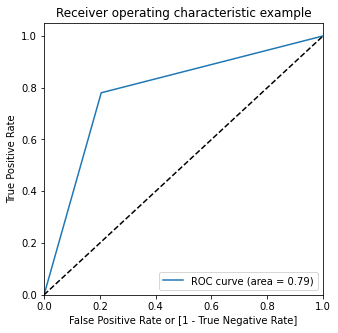

In [772]:
# Calling the function
draw_roc(y_pred_final.churn, y_pred_final.predicted)

**Random Forest Classifier**

In [836]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [838]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [839]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',rf_randomcv.best_score_,'using',rf_randomcv.best_params_)

We can get accuracy of 0.9224133773671283 using {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 1000, 'criterion': 'entropy'}


In [840]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=1000,
                             min_samples_leaf=2, 
                             min_samples_split=2,
                             max_features='log2',
                             n_estimators=800,
                             criterion =  'entropy' )

In [844]:
# fit
rfc.fit(X_train_SMOTE,y_train_SMOTE)

RandomForestClassifier(criterion='entropy', max_depth=1000, max_features='log2',
                       min_samples_leaf=2, n_estimators=800)

In [846]:
# predict
predictions = rfc.predict(X_test)

In [847]:
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

[[8138   67]
 [ 627  161]]
0.922828866896475
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8205
           1       0.71      0.20      0.32       788

    accuracy                           0.92      8993
   macro avg       0.82      0.60      0.64      8993
weighted avg       0.91      0.92      0.90      8993



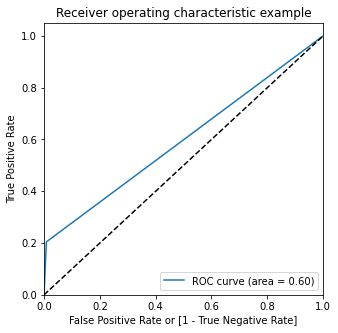

In [848]:
# Calling the function
draw_roc(y_test, predictions)

In [141]:
auc_score = metrics.roc_auc_score(y_test, predictions)

In [142]:
print(auc_score)

0.6177231909477012


**We are selecting the Logistic Regression model as it gives us good accuracy, sensitivity and accuracy.**

## Making Recommendation

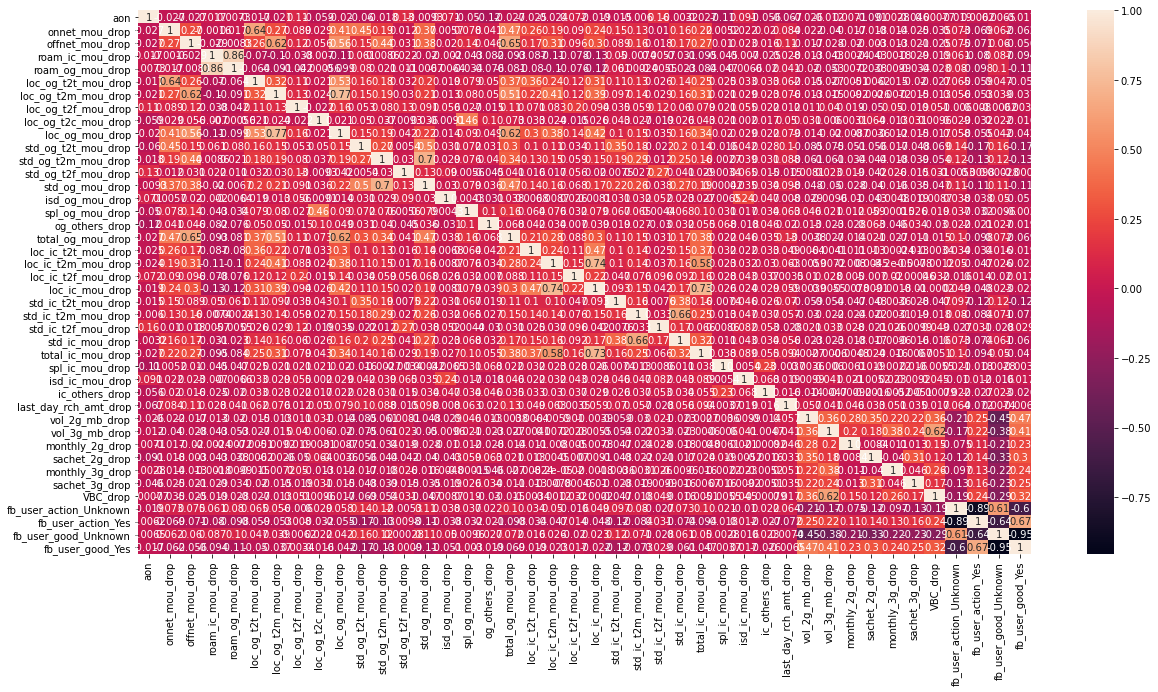

In [143]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df[X_train.columns].corr(),annot = True)
plt.show()

# Step : High Performance Model (with PCA)

### PCA on the data

In [144]:
X_train.shape

(20983, 42)

In [145]:
from sklearn.decomposition import PCA

In [146]:
pca = PCA(random_state=42)

In [147]:
pca.fit(X_train)

PCA(random_state=42)

#### Components from the PCA

In [148]:
pca.components_

array([[ 0.00577175, -0.24162675, -0.27066221, ...,  0.14056699,
        -0.13419851,  0.13437537],
       [-0.00475365,  0.05604807,  0.08665238, ...,  0.38005351,
        -0.43030082,  0.43504927],
       [-0.00334213,  0.10636569,  0.02800451, ...,  0.08540344,
        -0.10596017,  0.10374389],
       ...,
       [-0.05631352,  0.02528609,  0.01746412, ..., -0.69068504,
        -0.24814323, -0.20198566],
       [-0.01670125,  0.02282744,  0.03182681, ...,  0.00304927,
         0.00881084,  0.01019292],
       [-0.01673506,  0.00204652,  0.00532161, ...,  0.24355032,
        -0.64461595, -0.69052357]])

Looking at the explained variance ratio for each component

In [149]:
pca.explained_variance_ratio_

array([0.15868721, 0.10523474, 0.05681456, 0.04808842, 0.04130896,
       0.03781579, 0.03628091, 0.03470441, 0.03294169, 0.03113437,
       0.02712373, 0.02626544, 0.02549321, 0.02467741, 0.02237868,
       0.02171432, 0.02092978, 0.02016549, 0.01913857, 0.0172476 ,
       0.01557921, 0.01537901, 0.01498498, 0.01452614, 0.01368298,
       0.01338354, 0.01105163, 0.00988518, 0.00908413, 0.00897182,
       0.00836121, 0.00811419, 0.00811093, 0.00695237, 0.00622213,
       0.00579181, 0.00542252, 0.00528477, 0.00400586, 0.0031523 ,
       0.00293776, 0.00097024])

Making a scree plot for the explained variance

In [150]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

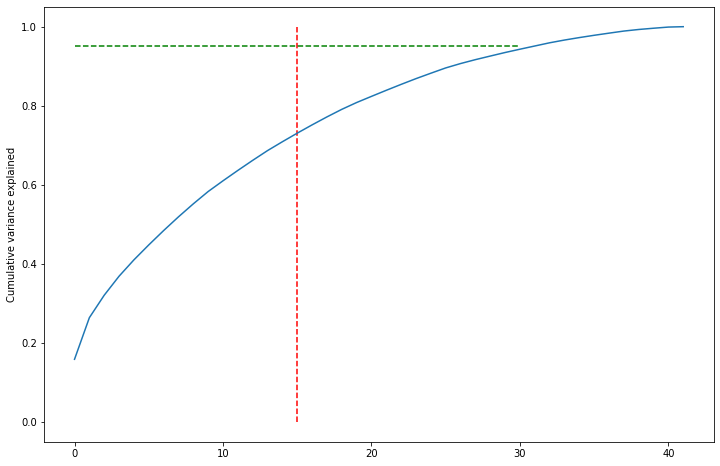

In [151]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Perform PCA with 16 components

In [152]:
from sklearn.decomposition import IncrementalPCA

In [153]:
pca_final = IncrementalPCA(n_components=30)

In [154]:
df_train_pca = pca_final.fit_transform(X_train)

In [155]:
df_train_pca.shape

(20983, 30)

In [156]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [157]:
corrmat.shape

(30, 30)

In [158]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8993, 30)

### Applying Logistic Regression on the data on our Principal components

In [159]:
df_train_pca.shape

(20983, 30)

In [160]:
y_train.shape

(20983,)

In [161]:
df_test_pca.shape

(8993, 30)

In [162]:
from sklearn.linear_model import LogisticRegression

In [163]:
learner_pca = LogisticRegression()

In [164]:
model_pca = learner_pca.fit(df_train_pca, y_train)

Making predictions on the train set

In [165]:
pred_probs_train = model_pca.predict_proba(df_train_pca)

In [166]:
pred_probs_train

array([[0.92331771, 0.07668229],
       [0.98928019, 0.01071981],
       [0.57824324, 0.42175676],
       ...,
       [0.95683571, 0.04316429],
       [0.89900719, 0.10099281],
       [0.99507636, 0.00492364]])

In [167]:
# Predicted probabilities
#y_pred_train = logsk.predict_proba(X_train_rfe)
# Converting y_pred to a dataframe which is an array
y_pred_train_df = pd.DataFrame(pred_probs_train)
# Converting to column dataframe
y_pred_train_1 = y_pred_train_df.iloc[:,[1]]
# Let's see the head
y_pred_train_1.head()

,1
0,0.076682
1,0.010720
2,0.421757
3,0.034104
4,0.029813


In [168]:
# Converting y_train to dataframe
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

,churn
68024,0
78728,0
36435,1
90044,0
19651,0


In [169]:
# Removing index for both dataframes to append them side by side 
y_pred_train_1.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_train_final = pd.concat([y_train_df,y_pred_train_1],axis=1)
# Renaming the column 
y_pred_train_final= y_pred_train_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_train_final.head()

,churn,Churn_Prob
0,0,0.076682
1,0,0.010720
2,1,0.421757
3,0,0.034104
4,0,0.029813


In [170]:
y_pred_train_final['churn'].value_counts()

0    19145
1     1838
Name: churn, dtype: int64

#### Finding Optimal Cutoff Point

In [171]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_train_final[i]= y_pred_train_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_pred_train_final.head()

,churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.076682,1,0,0,0,0,0,0,0,0,0
1,0,0.010720,1,0,0,0,0,0,0,0,0,0
2,1,0.421757,1,1,1,1,1,0,0,0,0,0
3,0,0.034104,1,0,0,0,0,0,0,0,0,0
4,0,0.029813,1,0,0,0,0,0,0,0,0,0


In [172]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_train_final.churn, y_pred_train_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.087595  1.000000  0.000000
0.1   0.1  0.778964  0.752992  0.781457
0.2   0.2  0.872278  0.592492  0.899138
0.3   0.3  0.902492  0.409684  0.949804
0.4   0.4  0.914073  0.219804  0.980726
0.5   0.5  0.915026  0.092492  0.993993
0.6   0.6  0.914407  0.035365  0.998799
0.7   0.7  0.912691  0.006529  0.999687
0.8   0.8  0.912405  0.000000  1.000000
0.9   0.9  0.912405  0.000000  1.000000


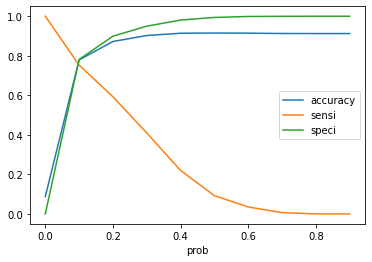

In [173]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.1 is the optimum point to take as a cutoff probability. This is because we need to maximize our sensitivity.

### Making Predictions

Making predictions on the test set

In [174]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [175]:
pred_probs_test

array([[0.95288978, 0.04711022],
       [0.98542675, 0.01457325],
       [0.95320175, 0.04679825],
       ...,
       [0.88417455, 0.11582545],
       [0.95137935, 0.04862065],
       [0.62920706, 0.37079294]])

In [176]:
y_pred_test_df = pd.DataFrame(pred_probs_test)
# Converting to column dataframe
y_pred_test_1 = y_pred_test_df.iloc[:,[1]]
# Let's see the head
y_pred_test_1.head()

,1
0,0.047110
1,0.014573
2,0.046798
3,0.436974
4,0.280610


In [177]:
# Converting y_train to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
61977,0
56530,0
4672,0
85889,1
94724,0


In [178]:
# Removing index for both dataframes to append them side by side 
y_pred_test_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_test_final = pd.concat([y_test_df,y_pred_test_1],axis=1)
# Renaming the column 
y_pred_test_final= y_pred_test_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_test_final.head()

,churn,Churn_Prob
0,0,0.047110
1,0,0.014573
2,0,0.046798
3,1,0.436974
4,0,0.280610


In [179]:
# Creating new column 'predicted' with 1 if Churn_Prob> Cutoff probability of 0.1 else 0
y_pred_test_final['predicted'] = y_pred_test_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)
# Let's see the head
y_pred_test_final.head()

,churn,Churn_Prob,predicted
0,0,0.047110,0
1,0,0.014573,0
2,0,0.046798,0
3,1,0.436974,1
4,0,0.280610,1


In [180]:
y_pred_test_final['predicted'].value_counts()

0    6627
1    2366
Name: predicted, dtype: int64

In [181]:
from sklearn import metrics

In [182]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_test_final.churn, y_pred_test_final.predicted )
confusion

array([[6445, 1760],
       [ 182,  606]])

In [183]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [184]:
print(confusion_matrix(y_pred_test_final.churn, y_pred_test_final.predicted))
print(accuracy_score(y_pred_test_final.churn, y_pred_test_final.predicted))
print(classification_report(y_pred_test_final.churn, y_pred_test_final.predicted))

[[6445 1760]
 [ 182  606]]
0.7840542644278884
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      8205
           1       0.26      0.77      0.38       788

    accuracy                           0.78      8993
   macro avg       0.61      0.78      0.63      8993
weighted avg       0.91      0.78      0.83      8993



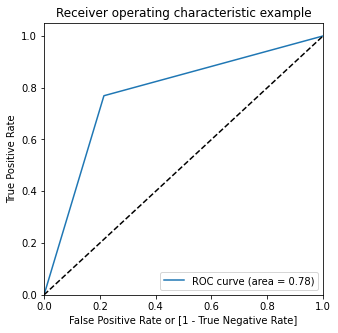

In [185]:
# Calling the function
draw_roc(y_pred_test_final.churn, y_pred_test_final.predicted)